# Workbook 4
This week, we will going over logistic regression and interactions. 

<img src="https://printables.space/files/uploads/download-and-print/large-printable-numbers/plus-a4-1200x1697.jpg" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+e_i$

Last couple weeks, we have talked about modeling and relationships. Typically, if we are modeling independent variables onto a dependent variable. 
* <b>Additive effects</b> are found when independent variables are left singular or without transformation. For example, we have a model where we have independent variables of gender, race, and age. The dependent variable is hourly wage. Here is what the model would look like:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<img src="https://www.shareicon.net/data/2016/03/02/727494_multiple_512x512.png" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+\beta_3*(variablea_i X variableb_i)+e_i$

* <b>Interaction effects</b> (e.g., between variables a and b) to test whether variable <i>a</i> changes the effect that variable <i>b</i> has on the outcome. For example, we have a model where we have dependent variable hourly wage. The independent variables of gender, race, and age. We are interested to know how race effects the relationship of gender on hourly wage. We can evaluate this relationship by using an interaction term race*gender. The model would look like this:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + \beta_{4}(gender*race_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
   
$\beta_{4}$ is the coefficient estimate of the interaction between gender and race
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<div class="alert alert-block alert-warning">
Remember, if you include an interaction term into the model---you must always have the additive and interaction terms included in the model. </div>

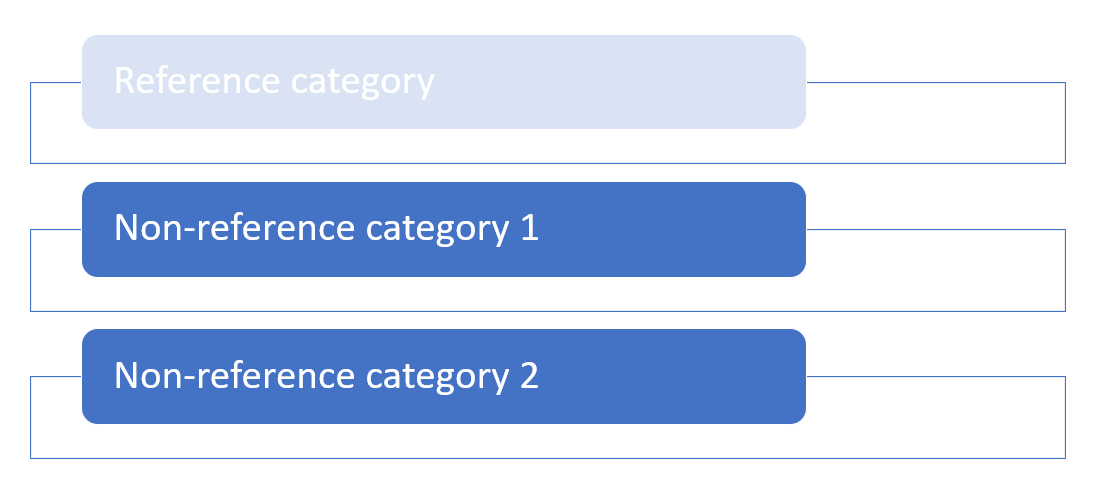

## Reference categories: <i>an important note about categorical variables</i>
Remember, that when using categorical variables in a regression model, you must set one of the categories in the categorical variable as the "reference category." All the beta estimates are referred back to that reference category.

In [3]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook hlthstat female




--------------------------------------------------------------------------------
hlthstat                                                           Health status
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: hlth

                 Range: [1,8]                         Units: 1
         Unique values: 6                         Missing .: 2/10,351

            Tabulation: Freq.   Numeric  Label
                        2,407         1  Excellent
                        2,591         2  Very good
                        2,938         3  Good
                        1,670         4  Fair
                          729         5  Poor
                           14         8  Blank but applicable
                            2         .  

--------------------------------------------------------------------------------
female                                                                    Fem

In [2]:
regress hlthstat female


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(1, 10347)     =     10.71
       Model |   15.966316         1   15.966316   Prob > F        =    0.0011
    Residual |  15428.8347    10,347  1.49114088   R-squared       =    0.0010
-------------+----------------------------------   Adj R-squared   =    0.0009
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2211

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |   .0786557   .0240374     3.27   0.001     .0315378    .1257736
       _cons |   2.552187    .017418   146.53   0.000     2.518045     2.58633
------------------------------------------------------------------------------


Based on the regression results, here is our regression line:

<center>$(healthstat_i) = \beta_0 + \beta_1*(female_i)$

<center>$(healthstat_i) = 2.55 + .08*(female_i)$

* Female is a categorical variable where 0=man and 1=woman. 
* Coefficient for female is .08 meaning women have greater .08 points on "healthstat" variables COMPARED TO THE REFERENCE CATEGORY.
* The reference category here is man, so women have greater .08 points on "healthstat" variables COMPARED to men.
* One limitation of categorical variable, is you can only refer the estimate for the categorical variable back to the reference category.
* You get to choose what variable is the reference category.

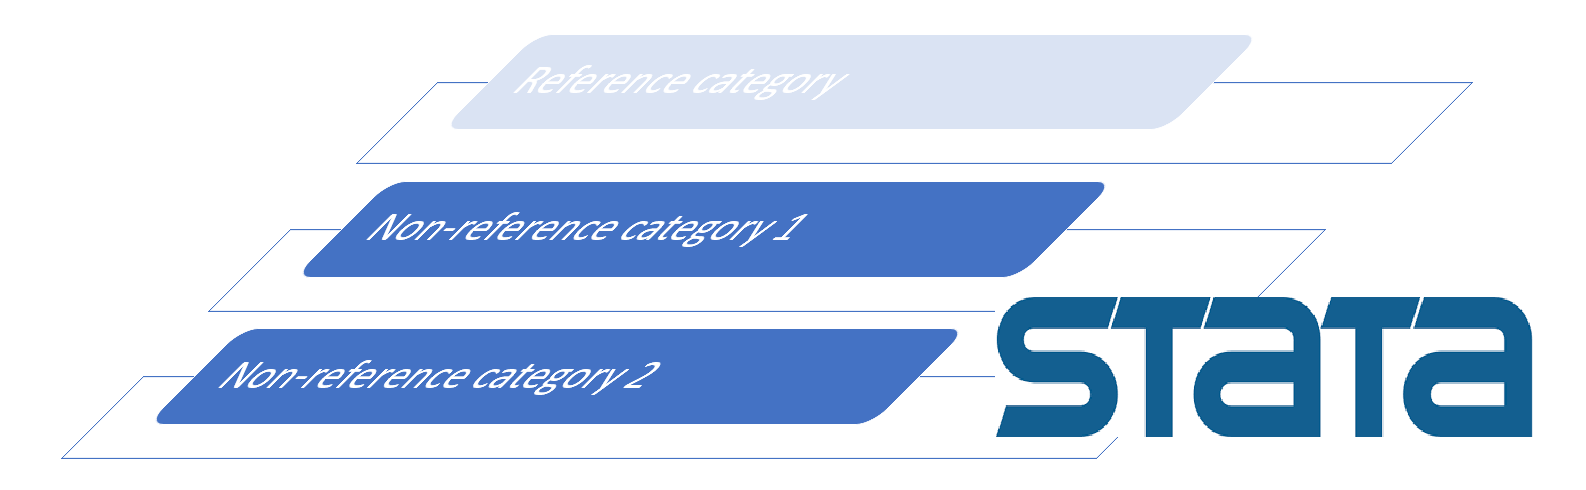

### Another important note about estimating categorical variables in Stata
Categorical variables must be in dummy variable format to run in Stata. Dummy variables are just variables represented by 0/1. So, let's say we have a region variable with the categories of northeast (1), mountain west (2), south (3), and west (4). 

| index | region |
| --- | --- | 
| 1 | 3 | 
| 2 | 2 |
| 3 | 2 | 
| 4 | 1 | 
| 5 | 1 | 
| 6 | 4 |
| 7 | 1 | 
| 8 | 3 | 

The region variable can be converted into four dummies variables:

| index | region | ne | mw | s | w |
| --- | --- | --- | --- | --- | --- |
| 1 | 3 | 0 | 0 | 1 | 0 |
| 2 | 2 | 0 | 1 | 0 | 0 |
| 3 | 2 | 0 | 1 | 0 | 0 |
| 4 | 1 | 1 | 0 | 0 | 0 |
| 5 | 1 | 1 | 0 | 0 | 0 |
| 6 | 4 | 0 | 0 | 0 | 1 |
| 7 | 1 | 1 | 0 | 0 | 0 |
| 8 | 3 | 0 | 0 | 1 | 0 |

Region is a categorical variable. ne, mw, s, and w are dummy variables. This is how to do it in Stata.

In [12]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/10,351

            Tabulation: Freq.   Numeric  Label
                        2,096         1  NE
                        2,774         2  MW
                        2,853         3  S
                        2,628         4  W


In [13]:
*This command makes separate dummy variables for each categorical variable
tabulate region, gen(dum)
    rename dum1 region_ne
    rename dum2 region_mw
    rename dum3 region_s
    rename dum4 region_w



     Region |      Freq.     Percent        Cum.
------------+-----------------------------------
         NE |      2,096       20.25       20.25
         MW |      2,774       26.80       47.05
          S |      2,853       27.56       74.61
          W |      2,628       25.39      100.00
------------+-----------------------------------
      Total |     10,351      100.00






In [15]:
regress hlthstat region_mw region_s region_w


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   region_mw |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
    region_s |    .380573   .0349066    10.90   0.000     .3121494    .4489966
    region_w |    .207626   .0355336     5.84   0.000     .1379732    .2772787
       _cons |   2.417184   .0265059    91.19   0.

### An easier way is to put a "i." in front of the categorical variable and Stata will automatically make the dummies to estimate the regression model

In [16]:
*Also, in Stata you want to use "i." to indicate categorical variable to Stata
regress hlthstat i.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         MW  |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
          S  |    .380573   .0349066    10.90   0.000     .3121494    .4489966
          W  |    .207626   .0355336     5.84   0.000     .1379732    .2772787
             |
       _cons |   2.4

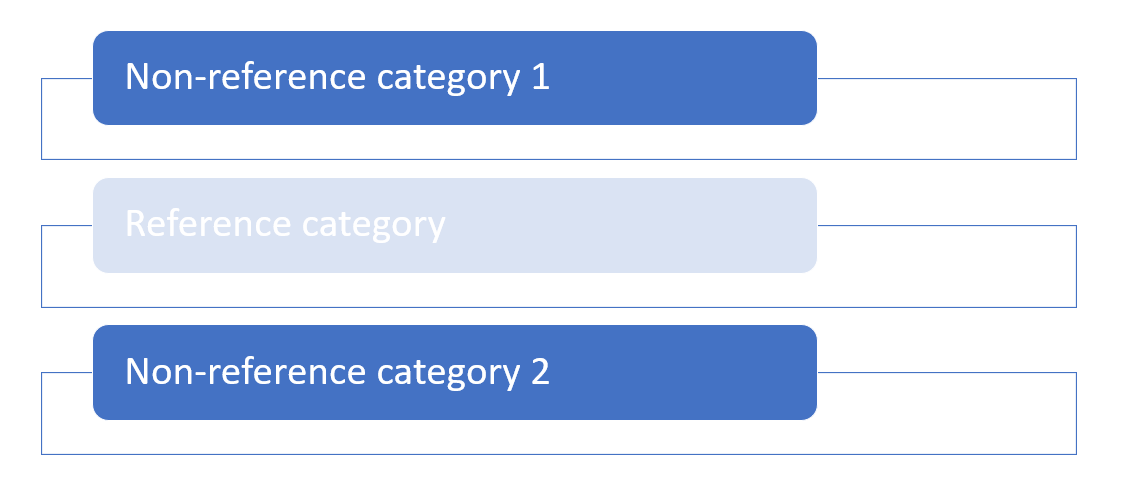

## Specifiying particular category as a reference category in Stata
Let's say, we have a categorical variable with mutiple categories. You can choose which ever category to be the reference. Here is how you can specify to Stata the specific reference category.

In [8]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
*This command gives you a all the numeric values of the categories.
*You are going to need to know the specific numeric value of the category.
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/10,351

            Tabulation: Freq.   Numeric  Label
                        2,096         1  NE
                        2,774         2  MW
                        2,853         3  S
                        2,628         4  W


Let's say, we want South region to be the reference category. South is region==3

In [9]:
regress hlthstat ib3.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.380573   .0349066   -10.90   0.000    -.4489966   -.3121494
         MW  |  -.3109194   .0323526    -9.61   0.000    -.3743367    -.247502
          W  |   -.172947   .0328021    -5.27   0.000    -.2372454   -.1086486
             |
       _cons |   2.7

"Heathstat" is lower in northeast, mountainwest, and west regions as compared to the south region. 

In [4]:
regress hlthstat ib4.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.207626   .0355336    -5.84   0.000    -.2772787   -.1379732
         MW  |  -.1379724   .0330282    -4.18   0.000     -.202714   -.0732308
          S  |    .172947   .0328021     5.27   0.000     .1086486    .2372454
             |
       _cons |    2.

"Heathstat" is lower in northeast and mountainwest regions as compared to the west region. "Heathstat" is greater in south region as compared to the west region. 

<img src="https://mathinsight.org/media/applet/image/large/cartesian_coordinate_axes_3d.png" width=300 height=300>

## Generally, we have three types of interactions. 
* Interaction term between two categorical variables
* Interaction term between one categorical variable and one numeric variable.
* Interaction term between two numeric variables

We will go over how to evaluate interactions in regression models in Stata.

## Interaction term between two categorical variables

So, we are interested in the understanding the role of age, gender, and region onto body mass index (bmi). Age and bmi are numeric variables. Gender and region are categorical variables.

<b>Additive model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)++\beta_4*(S_i)+\beta_5*(W_i)$

Then, we say for some hypothetical reason, we think the effect of gender on bmi changes based on region. We can evaluate this by using interaction terms.

<b>Interaction model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$

In [10]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\jupyter_nb\workbook 4"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\jupyter_nb\workbook 4


In [18]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
desc




Contains data from https://www.stata-press.com/data/r17/nhanes2.dta
 Observations:        10,351                  
    Variables:            58                  20 Dec 2020 10:07
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
sampl           long    %9.0g                 Unique case identifier
strata          byte    %9.0g                 Stratum identifier
psu             byte    %9.0g      psulbl     Primary sampling unit
region          byte    %9.0g      region     Region
smsa            byte    %22.0g     smsalbl    SMSA type
location        byte    %9.0g                 Location (stand office ID)
houssiz         byte    %9.0g                 Number of people in household
sex             byte    %9.0g      sex        Sex
race            byte    %9.0g      race     

In [19]:
*Additive model
regress bmi age i.female i.region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(5, 10345)     =     63.02
       Model |  7390.19781         5  1478.03956   Prob > F        =    0.0000
    Residual |  242633.964    10,345  23.4542256   R-squared       =    0.0296
-------------+----------------------------------   Adj R-squared   =    0.0291
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.843

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0488851   .0027674    17.66   0.000     .0434605    .0543097
             |
      female |
     Female  |   .0372717   .0953357     0.39   0.696    -.1496047    .2241481
             |
      region |
         MW  |   .0064779   .1402121     0.05   0.963     -.268365   

<b>In Stata, you can do the following: </b>
* Use the "##" notation between the two variables you want the interaction term. Using the "##" includes the additive and interaction terms. For example i.female##i.region
* Use the "#" notation between the two variables you want the interaction term. Using the "#" includes only the interaction term. For example i.female#i.region

In [5]:
*Interatice model
*Notice how I don't include the additive terms.
regress bmi age female##region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
          age |   .0488087   .0027671    17.64   0.000     .0433846    .0542328
              |
       female |
      Female  |  -.2939562   .2116093    -1.39   0.165    -.7087514    .1208389
              |
       region |
          MW  |  -.1420836   .2023593    -0.70   0.483     -

<b>We can make an estimated linear equation for each combination of female and region</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$

<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(female_i)+(-.14)*(MW_i)+(-.33)*(S_i)+(-.27)*(W_i)+.29*(female_ixMW_i)+.71*(female_ixS_i)+.23*(female_ixW_i)$

<b>female=0, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(0x0)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.39 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(0x1)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(0x0)+.71*(0x1)+.23*(0x0)$
    
<center>$(bmi_i) = 23.06 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(0x0)+.71*(0x0)+.23*(0x1)$
    
<center>$(bmi_i) = 22.79 + .05*(age_i)$

<b>female=1, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(1x0)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29)+ .05*(age_i)$
    
<center>$(bmi_i) = 23.1+ .05*(age_i)$

<b>female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(1x1)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.14+.29) + .05*(age_i)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(1x0)+.71*(1x1)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.33+.71) + .05*(age_i)$
    
<center>$(bmi_i) = 23.48 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(1x0)+.71*(1x0)+.23*(1x1)$
    
<center>$(bmi_i) = (23.39-.29-.27+.23) + .05*(age_i)$
    
<center>$(bmi_i) = (23.06) + .05*(age_i)$

<i>You can estimate bmi by pulling in age values. For example, the average age.</i>

In [22]:
summarize age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


<b> age=47.58, female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i) = (23.25) + .05*(age_i) $

<center>$(bmi_i) = (23.25) + .05*(47.58) $
    
<center>$(bmi_i) = 25.63$

In [6]:
*quietly command runs the command without posting the outprint
quietly regress bmi age female##region
*this post estimation command tells you how to call which variables
regress, coeflegend




      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi | Coefficient  Legend
--------------+----------------------------------------------------------------
          age |   .0488087  _b[age]
              |
       female |
      Female  |  -.2939562  _b[1.female]
              |
       region |
          MW  |  -.1420836  _b[2.region]
           S  |  -.3347762  _b[3.region]
           W  |  -.2694841  _b[4.region]
              |
female#region |
   Female#MW  |   .2897474  _b

### Margins command in Stata
The margins command is a easy way to graph these results in Stata. It is a postestimation command, so you have to regress first.

In [7]:
*The margins command helps calculate estiamtes for interactions
margins region#female, at(age=47.57965)


Adjusted predictions                                    Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
At: age = 47.57965

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
region#female |
     NE#Male  |   25.71501   .1517587   169.45   0.000     25.41753    26.01248
   NE#Female  |   25.42105   .1474742   172.38   0.000     25.13197    25.71013
     MW#Male  |   25.57292   .1338383   191.07   0.000     25.31058    25.83527
   MW#Female  |   25.56872   .1265618   202.03   0.000     25.32063     25.8168
      S#Male  |   25.38023   .1326702   191.30   0.000     25.12017    25.64029
    S#Female  |   25.79874   .1241829   207.75   0.000     25.55532    26.04216
      W#Male  |   25.44552   .1366851   186.16   0.000     25.17759

In [8]:
*female=0, all region variables=0 and age=47.57965
*this matches NE#Male
di _b[_cons]+(_b[age])*47.57965

25.715008


In [11]:
marginsplot, noci
graph export "marginsplot_bmi_female_region.png", replace width(3400)



Variables that uniquely identify margins: region female

file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

file marginsplot_bmi_female_region.png saved as PNG format


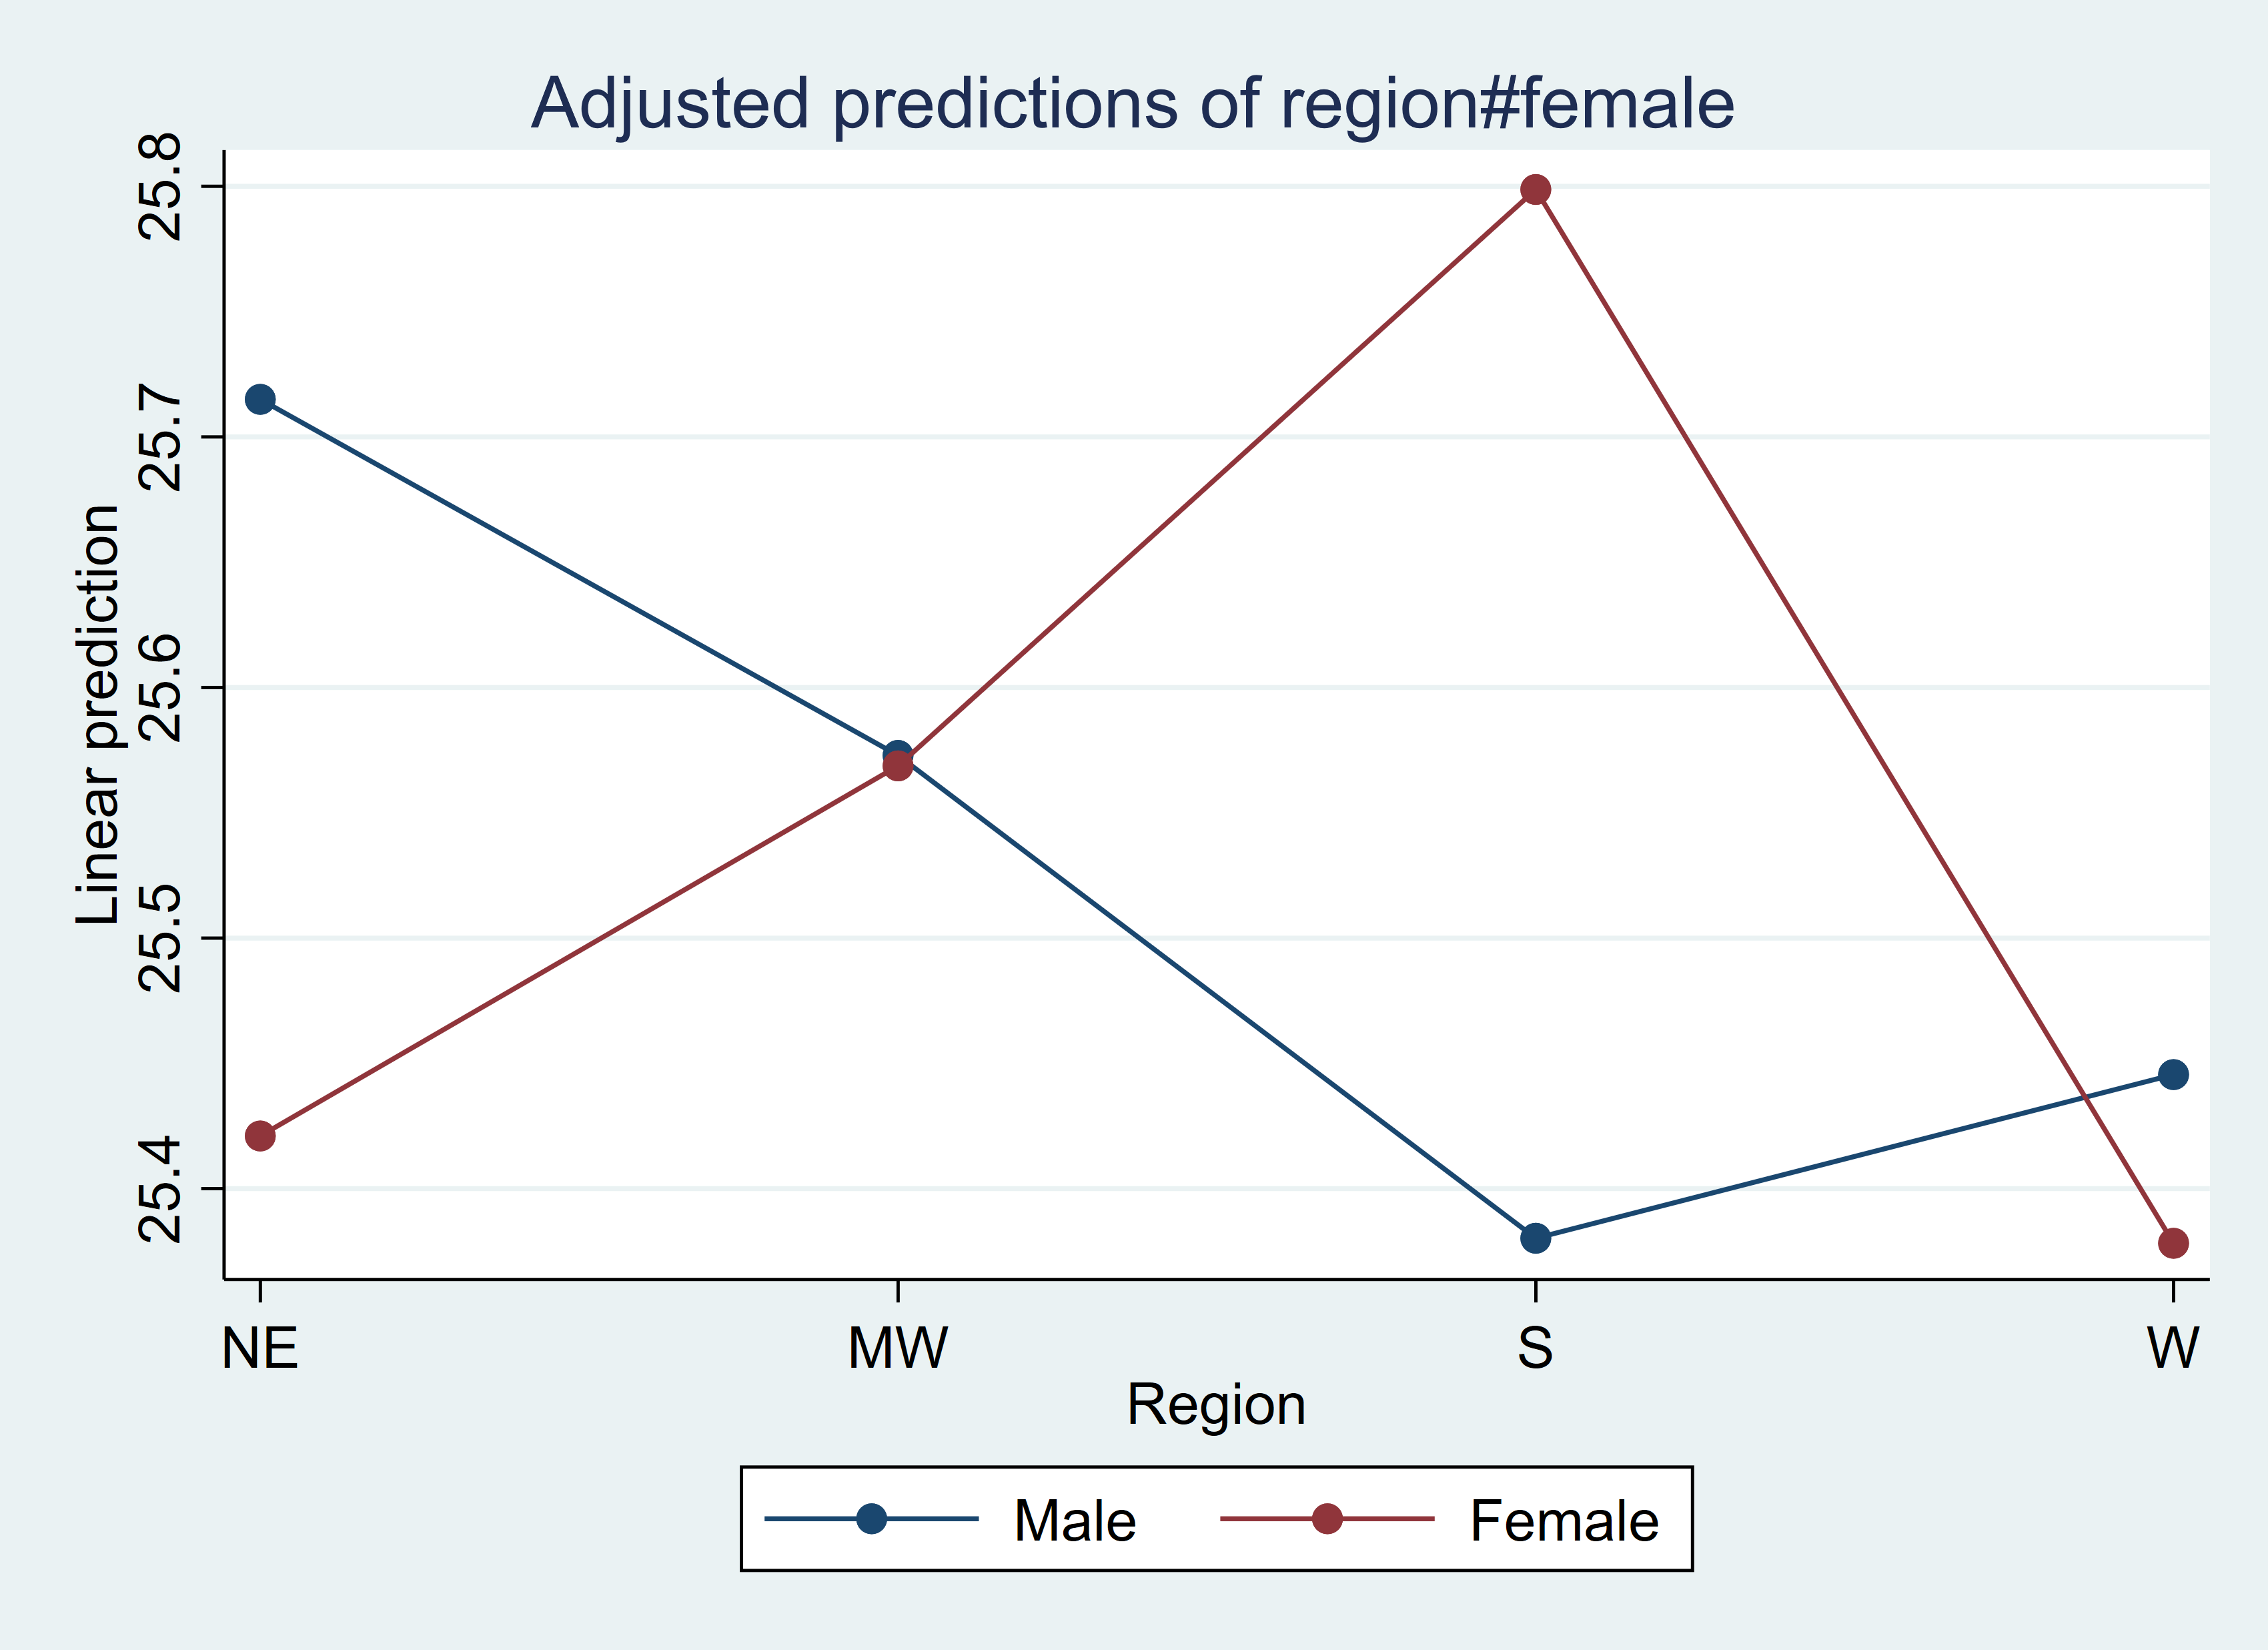

While holding age constant at its mean, we see important the effect of gender on bmi differents based on regions. We can examine which interaction terms are statistically significant to which relatonships are stronger. The effect of south region is statistically significant. The effect of gender on bmi is strongest for the south region.

## Interaction term between one categorical variable and one numeric variable

Let's say, we want to fit a model predicting income across independent variables educational attainment and gender. Here income and educational attainment are numeric variables. Educational attainment is measured in the number of years of school. Gender is a categorical variable.

<b>Additive model</b> 

<center>$(income_i)=\beta_0+\beta_1*(educ_i)+\beta_2*(male_i)$

Here we are interested in whether the effect of educational attainment on income differs between gender.

<b>Interaction model</b>

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

In [12]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\jupyter_nb\workbook 4"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\jupyter_nb\workbook 4


In [39]:
*First let's open our data set.
use "http://www.stata-press.com/data/agis6/c10interaction", clear
desc




Contains data from http://www.stata-press.com/data/agis6/c10interaction.dta
 Observations:           120                  
    Variables:             4                  9 Feb 2016 12:06
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
inc             int     %8.0g                 Income in 1000s
educ            byte    %8.0g                 Years of education
male            byte    %8.0g                 females are 1 and males are 0
alienation      byte    %8.0g                 Alienation 0 to 10
--------------------------------------------------------------------------------
Sorted by: male


In [40]:
regress inc educ male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(2, 117)       =     37.19
       Model |  100464.105         2  50232.0527   Prob > F        =    0.0000
    Residual |  158015.895       117   1350.5632   R-squared       =    0.3887
-------------+----------------------------------   Adj R-squared   =    0.3782
       Total |      258480       119  2172.10084   Root MSE        =     36.75

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   8.045694   1.008586     7.98   0.000     6.048243    10.04315
        male |   19.04991   6.719787     2.83   0.005     5.741726     32.3581
       _cons |  -42.54411    14.2919    -2.98   0.004    -70.84847   -14.23975
--------------------------------------------------

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(male_i)$

In [42]:
predict incfnoi if male==0
predict incmnoi if male==1


(option xb assumed; fitted values)
(60 missing values generated)

(option xb assumed; fitted values)
(60 missing values generated)


<b> male==0</b>

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(0)$

<b>male==1</b>

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(1)$
   
<center>$(income_i)=-23.49+8.05*(educ_i)$

In [43]:
twoway (connected incmnoi educ if male==1, lcolor(red) lpattern(dot) msymbol(diamond) ///
    msize(large)) ///
    (connected incfno educ if male==0, lcolor(black) lpattern(solid) msymbol(circle) ///
    msize(large)), ///
    ytitle(Income in thousands) xtitle(Education) legend(order(1 "Men" 2 "Women"))
graph export "educ_male_additive_twoway.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file educ_male_additive_twoway.png not found)
file educ_male_additive_twoway.png saved as PNG format


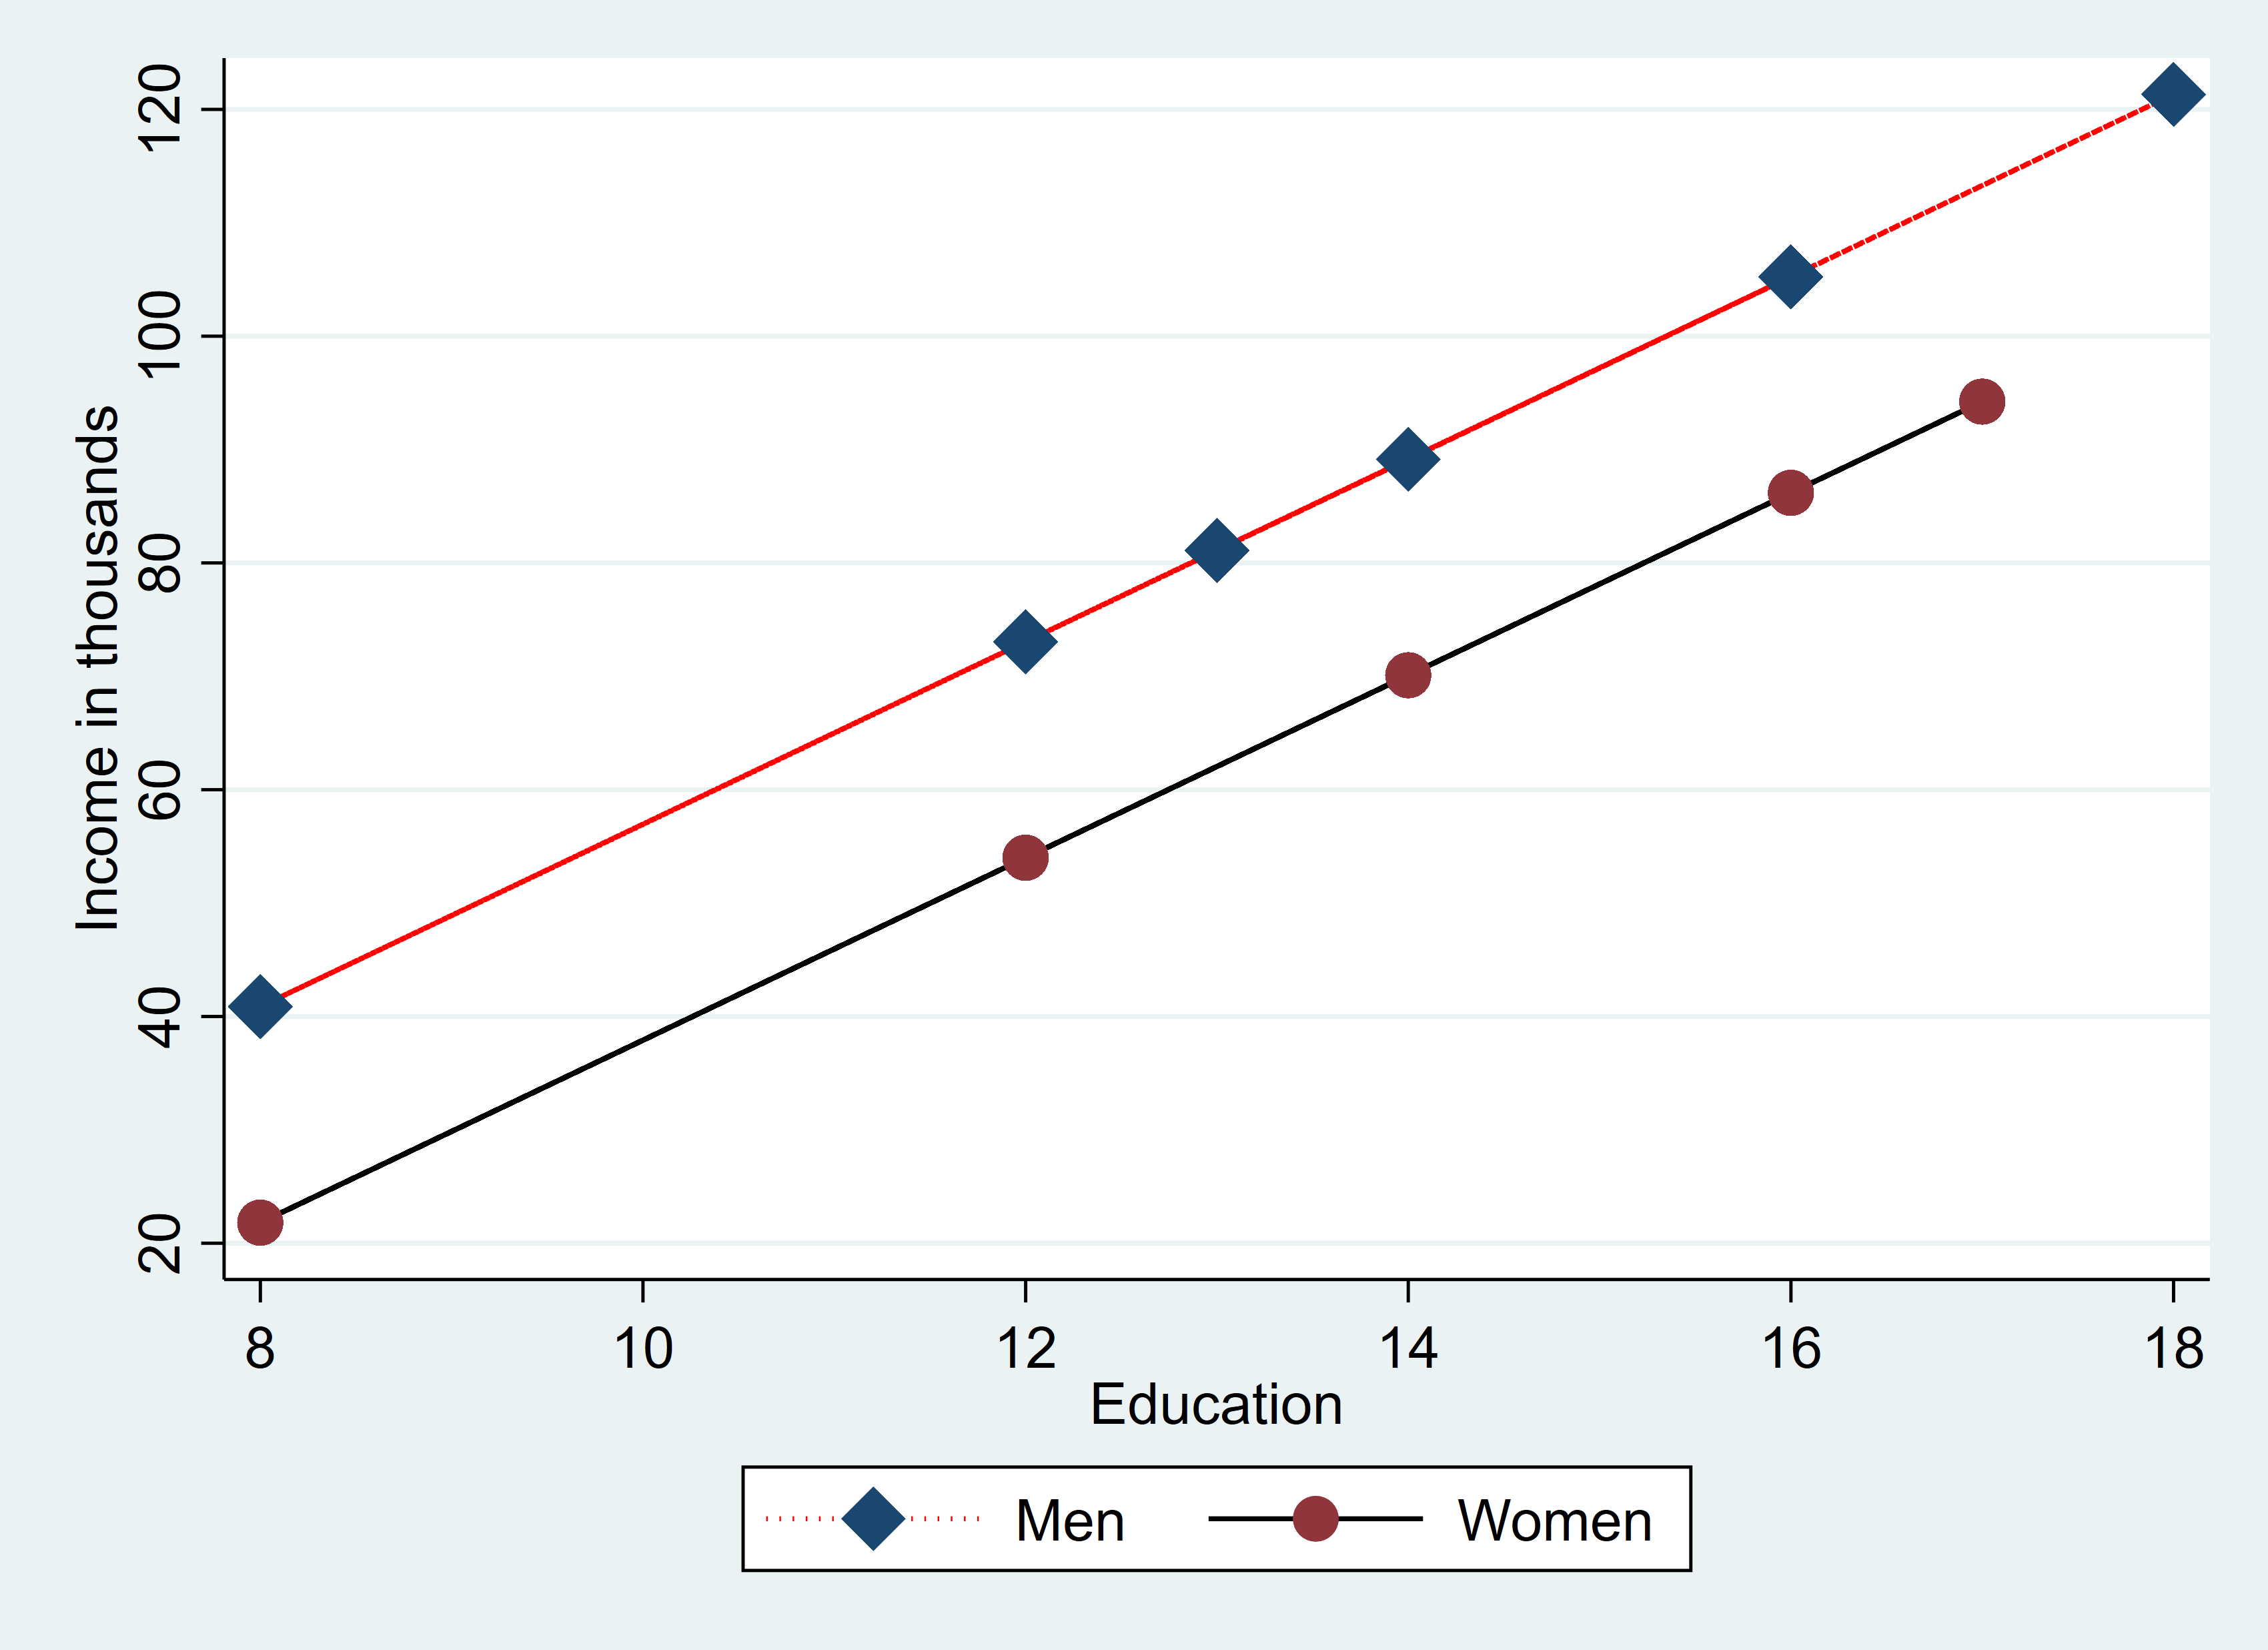

We see some differences between gender, but let's see if we can estimate it with interaction terms.

## Centering variables when transforming them
A conservative way of transforming variables it to center them. It is recommended to center the variables when using the interactions or transforming them. The way to center a variable is by subtracting mean of the variable from the values.

When you center variables, it makes the mean 0. In other words, the intercept (0) is basically the mean. Thus, positive values indicate "above the average" and negative values mean "below the average.

### There are two ways to do interactions in Stata
#### METHOD 1

In [44]:
use "http://www.stata-press.com/data/agis6/c10interaction", clear
*You can use the r(mean) command, but only if you use the summ command beforehand.
summarize educ
gen edu_cen= educ - r(mean)




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        educ |        120       13.55    3.345259          8         18



In [45]:
gen educc_men=edu_cen*male

In [46]:
*You can use the # between variables
regress inc educ male educc_men


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.717         3  40868.2389   Prob > F        =    0.0000
    Residual |  135875.283       116  1171.33865   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531094    6.351628
        male |   19.17645   6.258121     3.06   0.003     6.781452    31.57145
   educc_men |   8.196445   1.885263     4.35   0.000     4.462444    11.93045
       _cons |   16.84834   19.07279     0.88   0.

In [47]:
*Here is the way folks generate an interaction without centering.
gen ed_men=educ*male
regress inc educ male ed_men




      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.719         3  40868.2397   Prob > F        =    0.0000
    Residual |  135875.281       116  1171.33863   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531092    6.351628
        male |  -91.88539   26.27242    -3.50   0.001    -143.9212   -39.84954
      ed_men |   8.196446   1.885263     4.35   0.000     4.462445    11.93045
       _cons |   16.84834   19.07279     0.88   

#### METHOD 2 (prefer method)

In [51]:
*You can use the # between variables
regress inc c.educ##i.male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.719         3  40868.2397   Prob > F        =    0.0000
    Residual |  135875.281       116  1171.33863   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531092    6.351628
      1.male |  -91.88539   26.27242    -3.50   0.001    -143.9212   -39.84954
             |
 male#c.educ |
          1  |   8.196446   1.885263     4.35   0.000     4.462445    11.93045
             |
     

It is hard to interpret this value, so it is helpful to make equation for both male and female.

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

First, let's make the equation line for female so male=0.


<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(0) + 8.20*(educ_i * 0)$
    
<center>$income_i = 16.85 + 3.60*(educ_i)$

Second, let's make the equation for male so male=1

<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(1) + 8.20*(educ_i * 1)$
    
<center>$income_i = (16.85 -91.86) + (3.60 + 8.20)*(educ_i)$
    
<center>$income_i = -75.01 + 11.80*(educ_i)$

Now, we can compare the slopes for $(educ_i)$ between men and women. For women, the slope between educational years and income is 3.60. This means for each additional year of education there is a \\$3,600 increase in income. For men, the slope between educational years and income is 11.80. This means for each additional year of education there is a \\$11,800 increase in income. Stark polarity!

### Margins command in Stata
The margins command is a easy way to graph these results in Stata. It is a postestimation command, so you have to regress first.

In [49]:
quietly regress inc c.educ##i.male
*When using the margins command, if there are numeric variables, you need to specify the values.
margins male , at (educ=(8(2)18))




Adjusted predictions                                       Number of obs = 120
Model VCE: OLS

Expression: Linear prediction, predict()
1._at: educ =  8
2._at: educ = 10
3._at: educ = 12
4._at: educ = 14
5._at: educ = 16
6._at: educ = 18

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    _at#male |
        1 0  |   45.66729    8.66112     5.27   0.000     28.51285    62.82173
        1 1  |   19.35346   8.545103     2.26   0.025      2.42881    36.27812
        2 0  |   52.87203   6.431252     8.22   0.000     40.13412    65.60993
        2 1  |   42.95109   6.496577     6.61   0.000      30.0838    55.81838
        3 0  |   60.07676   4.808436    12.49   0.000     50.55305    69.60048
        3 1  |   66.54872   4.940843    13.47   0.000     56.76276    76

<b>educ=8 and male =0</b>

<center>$income_i = 16.85 + 3.60*(8)$
    
<center>$income_i = 16.85 +28.8$
    
<center>$income_i = 45.65$

<b>educ=8 and male =1</b>

<center>$income_i = -75.01 + 11.80*(8)$

<center>$income_i = -75.01 + 94.4$
    
<center>$income_i = 19.39$

Stata will even make graphs based on margins estimates.

In [50]:
marginsplot
graph export "marginsplot_educ_male.png", replace width(3400)



Variables that uniquely identify margins: educ male

file C:/Users/acade/.stata_kernel_cache/graph2.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph2.pdf saved as PDF format

file marginsplot_educ_male.png saved as PNG format


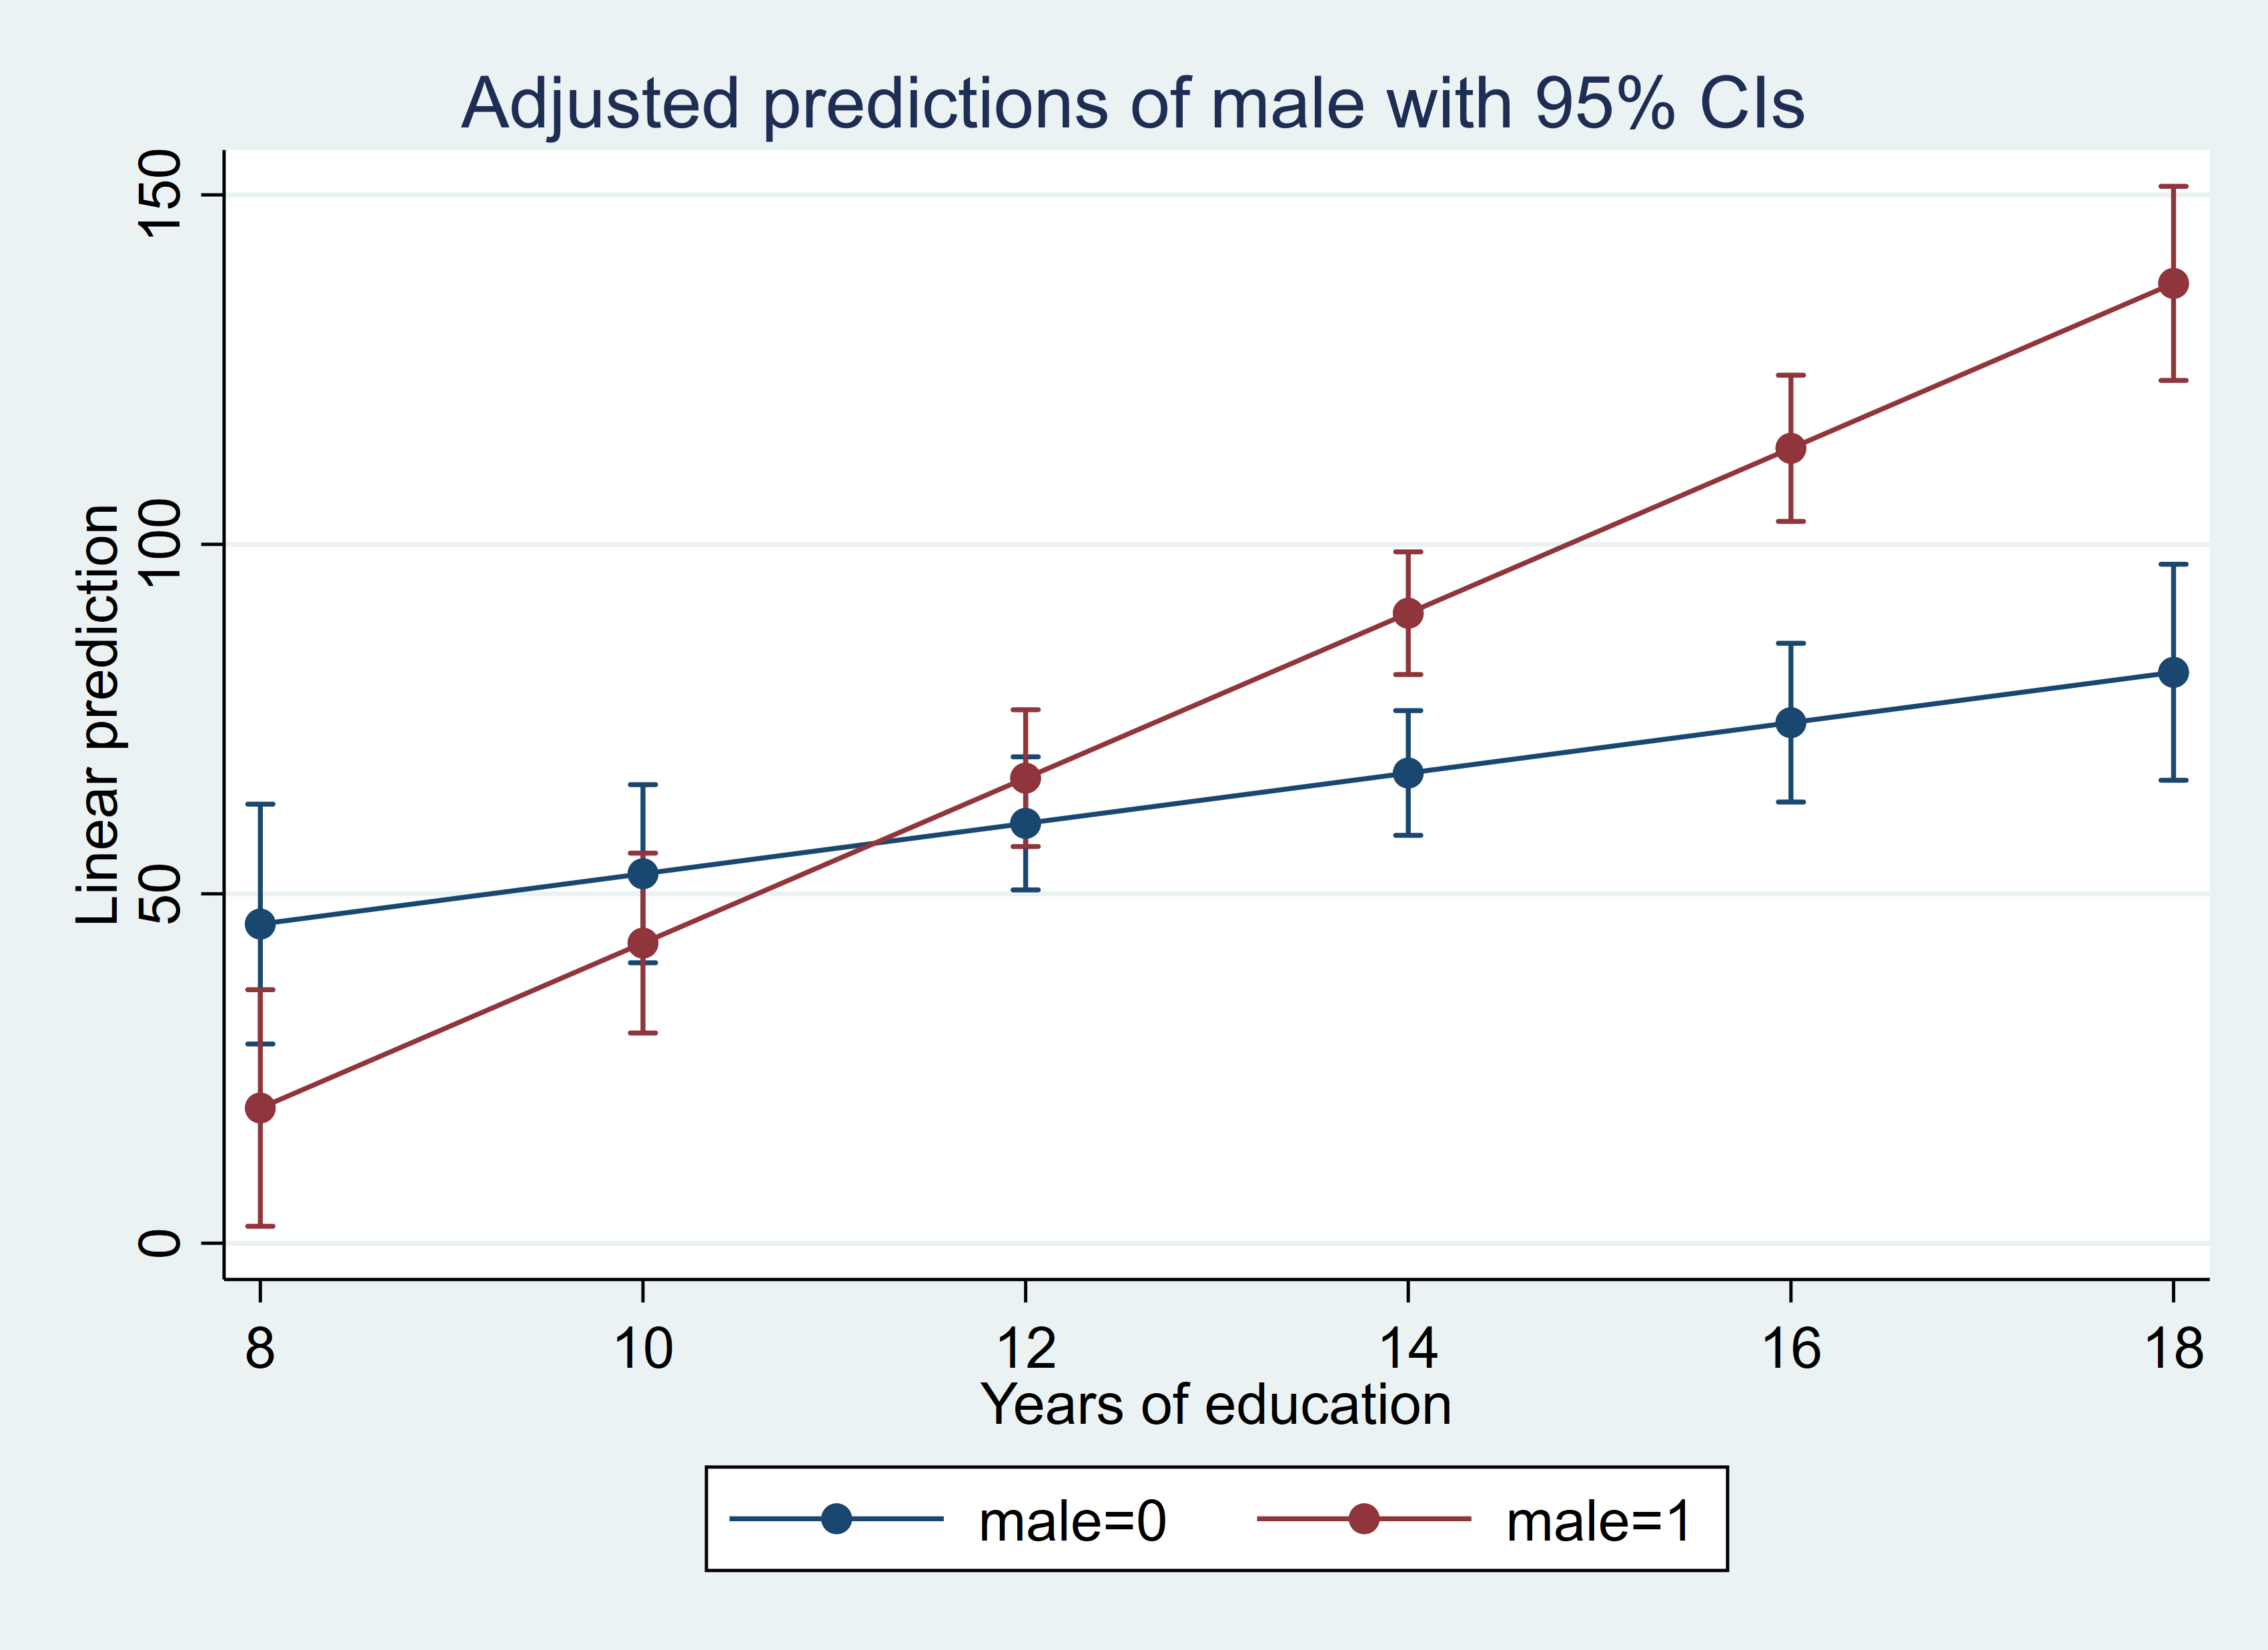

<i>The effect of educational attainment has on income is much stronger for men as compared to women.</i>

### What would have happened if we centered the variables?

In [105]:
use "http://www.stata-press.com/data/agis6/c10interaction", clear
*You can use the r(mean) command, but only if you use the summ command beforehand.
summarize educ
gen edu_cen= educ - r(mean)

gen educc_men=edu_cen*male

regress inc educ i.male educc_men




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        educ |        120       13.55    3.345259          8         18




      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.717         3  40868.2389   Prob > F        =    0.0000
    Residual |  135875.283       116  1171.33865   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .853109

It is hard to interpret this value, so it is helpful to make equation for both male and female.

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

First, let's make the equation line for female so male=0.

<center>$income_i = 16.85 + 3.60*(educ_i) + (19.18)*(0) + 8.20*(educ_i * 0)$
    
<center>$income_i = 16.85 + 3.60*(educ_i)$

Second, let's make the equation for male so male=1

<center>$income_i = 16.85 + 3.60*(educ_i) + (19.18)*(1) + 8.20*(educ_i * 1)$
    
<center>$income_i = (16.85 +19.18) + (3.60 + 8.20)*(educ_i)$
    
<center>$income_i = 36.03 + 11.8*(educ_i)$

SAME SLOPES AS BEFORE. Women's slope is still 3.60. Men's slope is still 11.80. Only the intercept changes

In [55]:
twoway ///
    function y=36.03+11.8*x, color(red) lpattern(dash) ///
    || function y=16.85+3.6*x, color(black) ///
    || function y=-75.01+11.80*x, color(green) ///
    || function y=16.85+3.6*x, color(orange) lpattern(dash)
graph export "comparinglines.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph5.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph5.pdf saved as PDF format

file comparinglines.png saved as PNG format


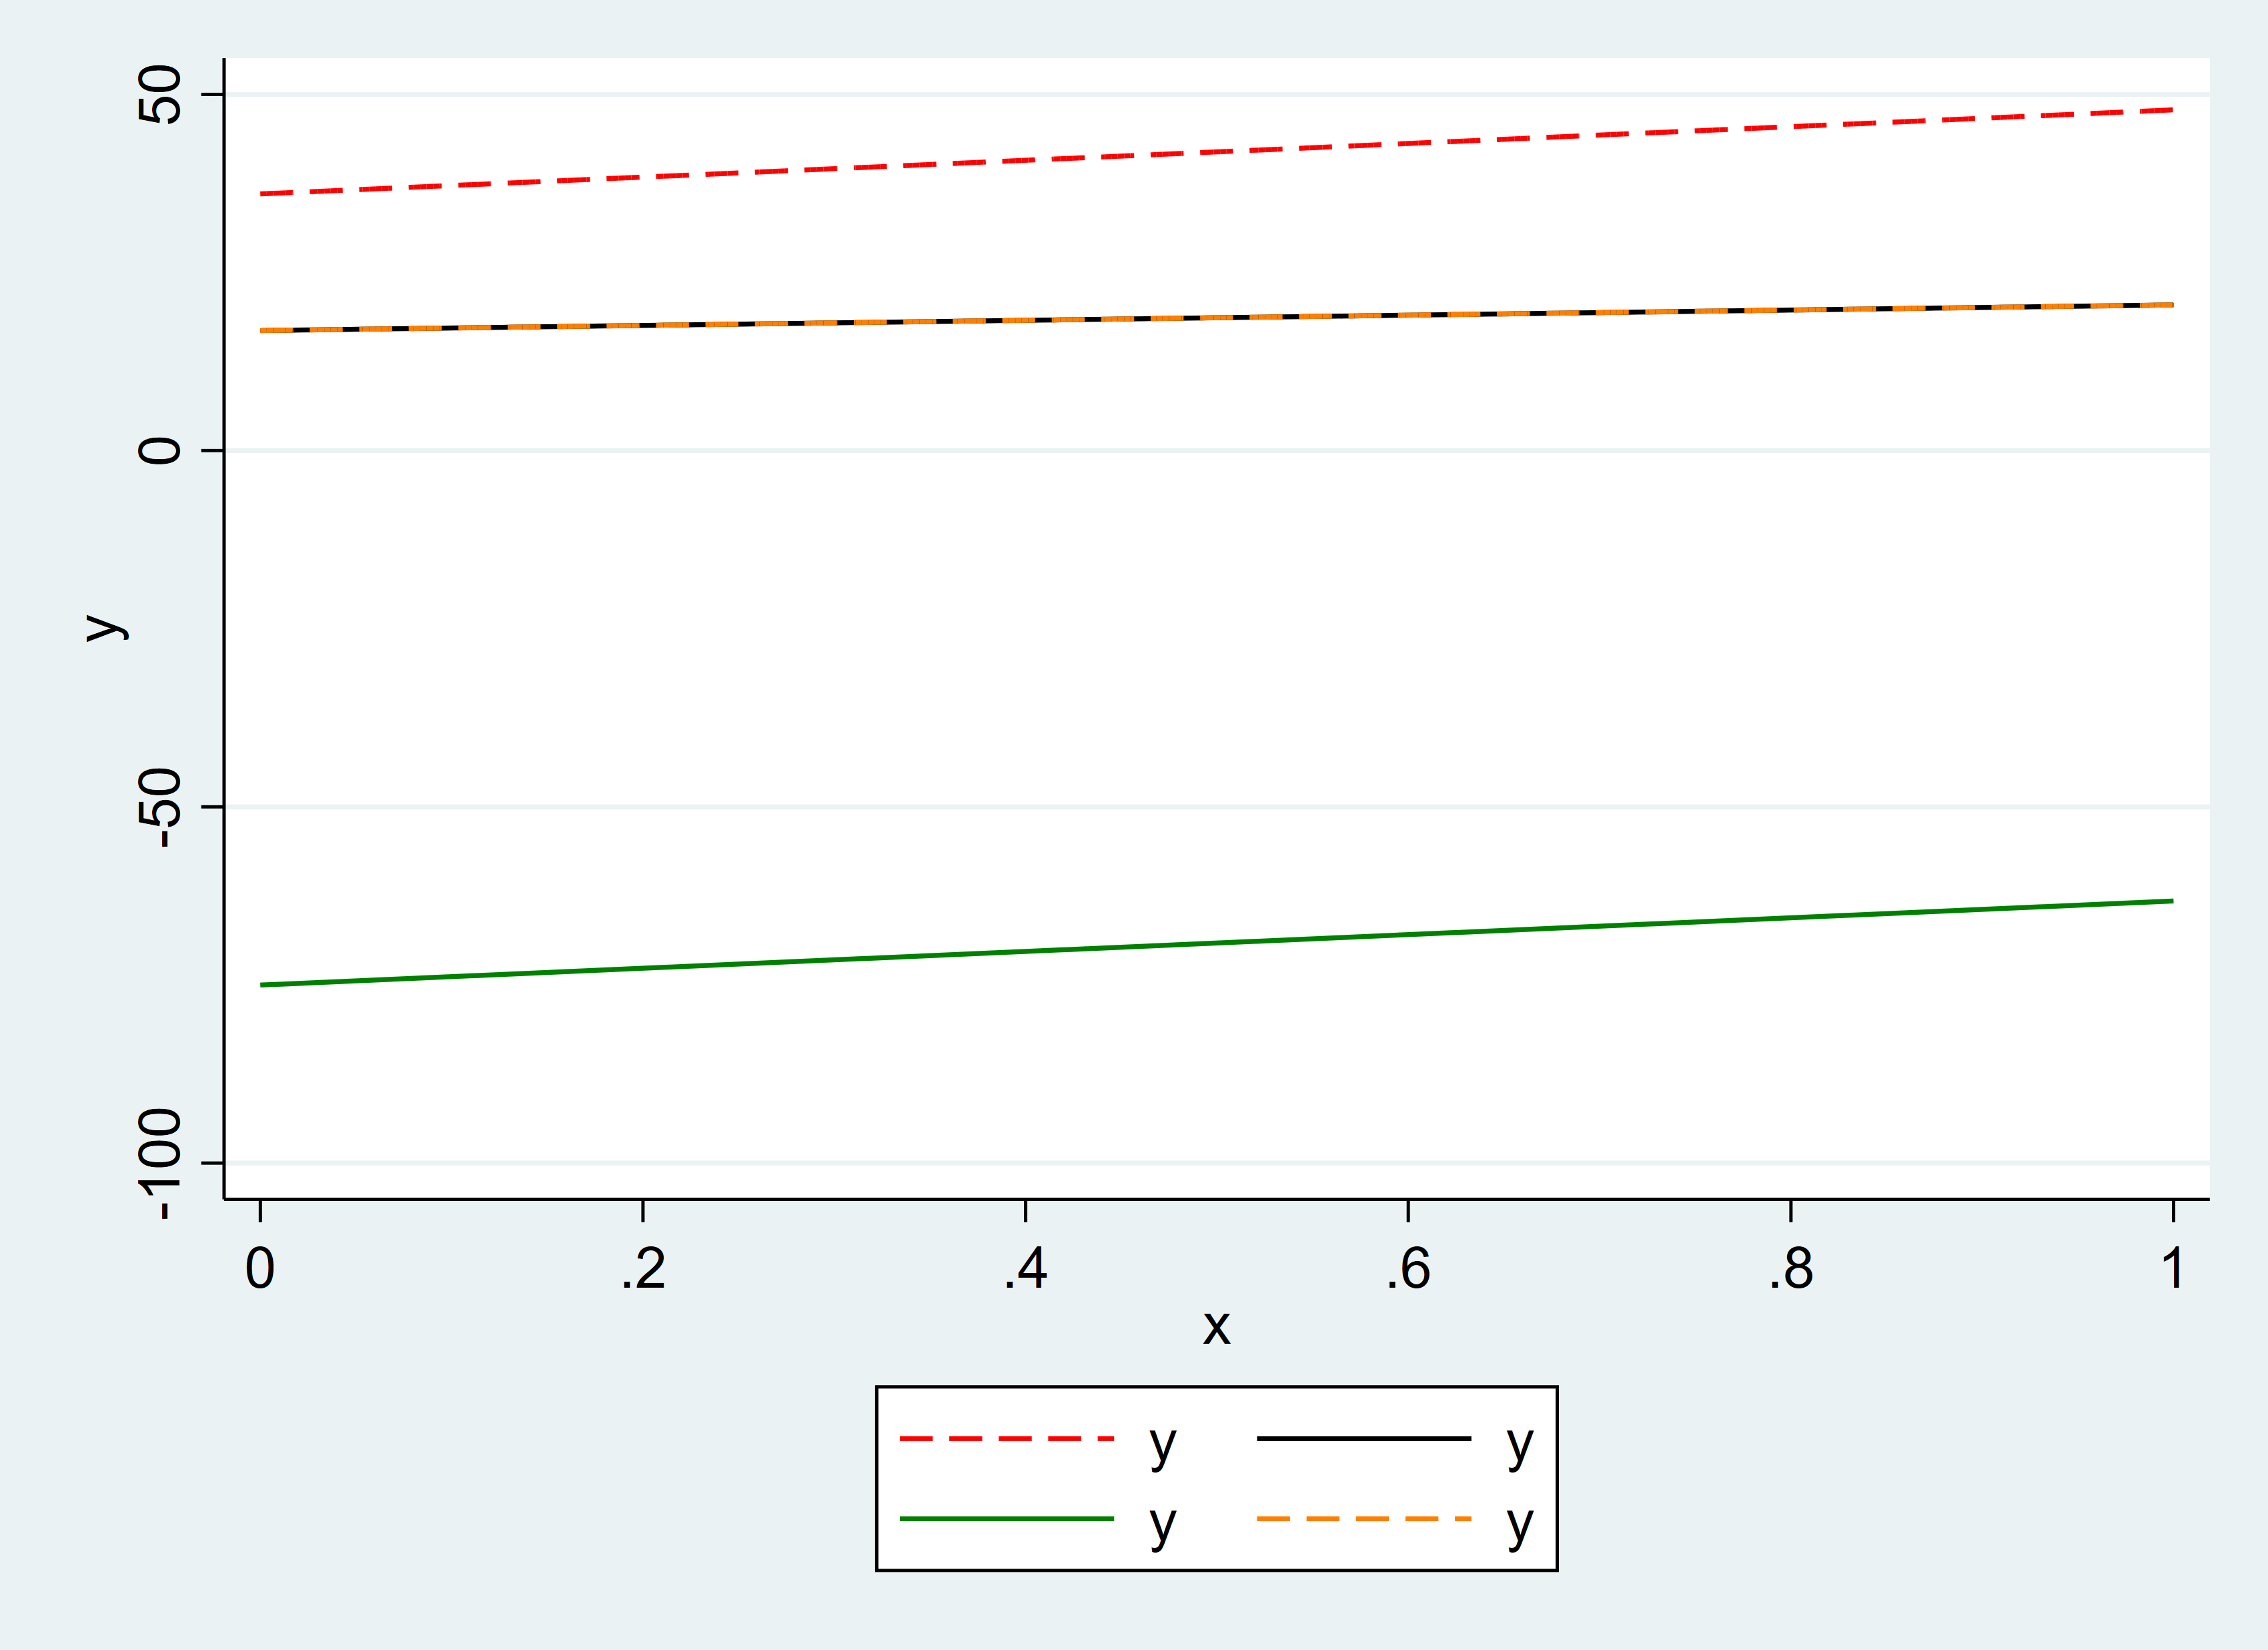

## Interactions between two numeric variables

Let's say, we want to fit a model predicting bmi across independent variables age, vitamin c, gender, and region.
    
<b>Additive model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

Let's say we think the effect of vitamin c intake changes the relationship between age to bmi

<b>Interaction model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

In [56]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
summ vitaminc, detail




                   Serum vitamin C (mg/dL)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           .2             .1
 5%           .3             .1
10%           .3             .1       Obs               9,973
25%           .6             .1       Sum of wgt.       9,973

50%            1                      Mean           1.034814
                        Largest       Std. dev.      .5813791
75%          1.4            8.3
90%          1.7            9.4       Variance       .3380017
95%          1.9           13.9       Skewness       4.539869
99%          2.4           18.1       Kurtosis       108.2617


In [59]:
regress bmi age vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(6, 9966)      =     68.34
       Model |  9515.65877         6  1585.94313   Prob > F        =    0.0000
    Residual |  231262.471     9,966  23.2051446   R-squared       =    0.0395
-------------+----------------------------------   Adj R-squared   =    0.0389
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8172

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0524663   .0028167    18.63   0.000     .0469449    .0579877
    vitaminc |  -.8312809   .0862732    -9.64   0.000    -1.000394   -.6621679
             |
      female |
     Female  |   .1901829   .0983902     1.93   0.053    -.0026818    .3830475
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

<center>$(bmi_i)=23.90+.05*(age_i)+(-.83)*(vitaminc_i)+.19*(female_i)+(-.08)*(mw_i)+(-.20)*(s_i)+(-.15)*(w_i)$

In [60]:
regress bmi c.age##c.vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0220407   .0059366     3.71   0.000     .0104038    .0336777
    vitaminc |  -2.331426   .2717928    -8.58   0.000    -2.864194   -1.798657
             |
       c.age#|
  c.vitaminc |    .029107   .0050017     5.82   0.000     .0193026    .0389115
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

<center>$(bmi_i)=25.46+.02*(age_i)+(-2.33)*(vitaminc_i)+.03*(age_ixvitaminc_i)+.19*(female_i)+(-.09)*(mw_i)+(-.21)*(s_i)+(-.16)*(w_i)$

The interaction is positive generally telling us as vitamin c intake increases and age increase, there is a generally an increase to bmi.

In [61]:
regress, coeflegend


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Legend
-------------+----------------------------------------------------------------
         age |   .0220407  _b[age]
    vitaminc |  -2.331426  _b[vitaminc]
             |
       c.age#|
  c.vitaminc |    .029107  _b[c.age#c.vitaminc]
             |
      female |
     Female  |   .1858965  _b[1.female]
             |
      region |
         MW  |  -.0936871  _b[2.region]
          S  |  -.2137082  _b[3.region

In [62]:
*This calculates the predicted values with specific age and vitamin c values AND other variables are at average.
margins , at(age=(20(25)70) vitaminc=(.2(.6)2)) atmeans vsquish


Adjusted predictions                                     Number of obs = 9,973
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  age      =       20
        vitaminc =       .2
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
2._at:  age      =       20
        vitaminc =       .8
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
3._at:  age      =       20
        vitaminc =      1.4
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
4._at:  age      =       20
        vitaminc =        2
        0

In [64]:
marginsplot, x(age)
graph export "vitaminc_age.png", replace width(3400)



Variables that uniquely identify margins: age vitaminc

file C:/Users/acade/.stata_kernel_cache/graph7.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph7.pdf saved as PDF format

file vitaminc_age.png saved as PNG format


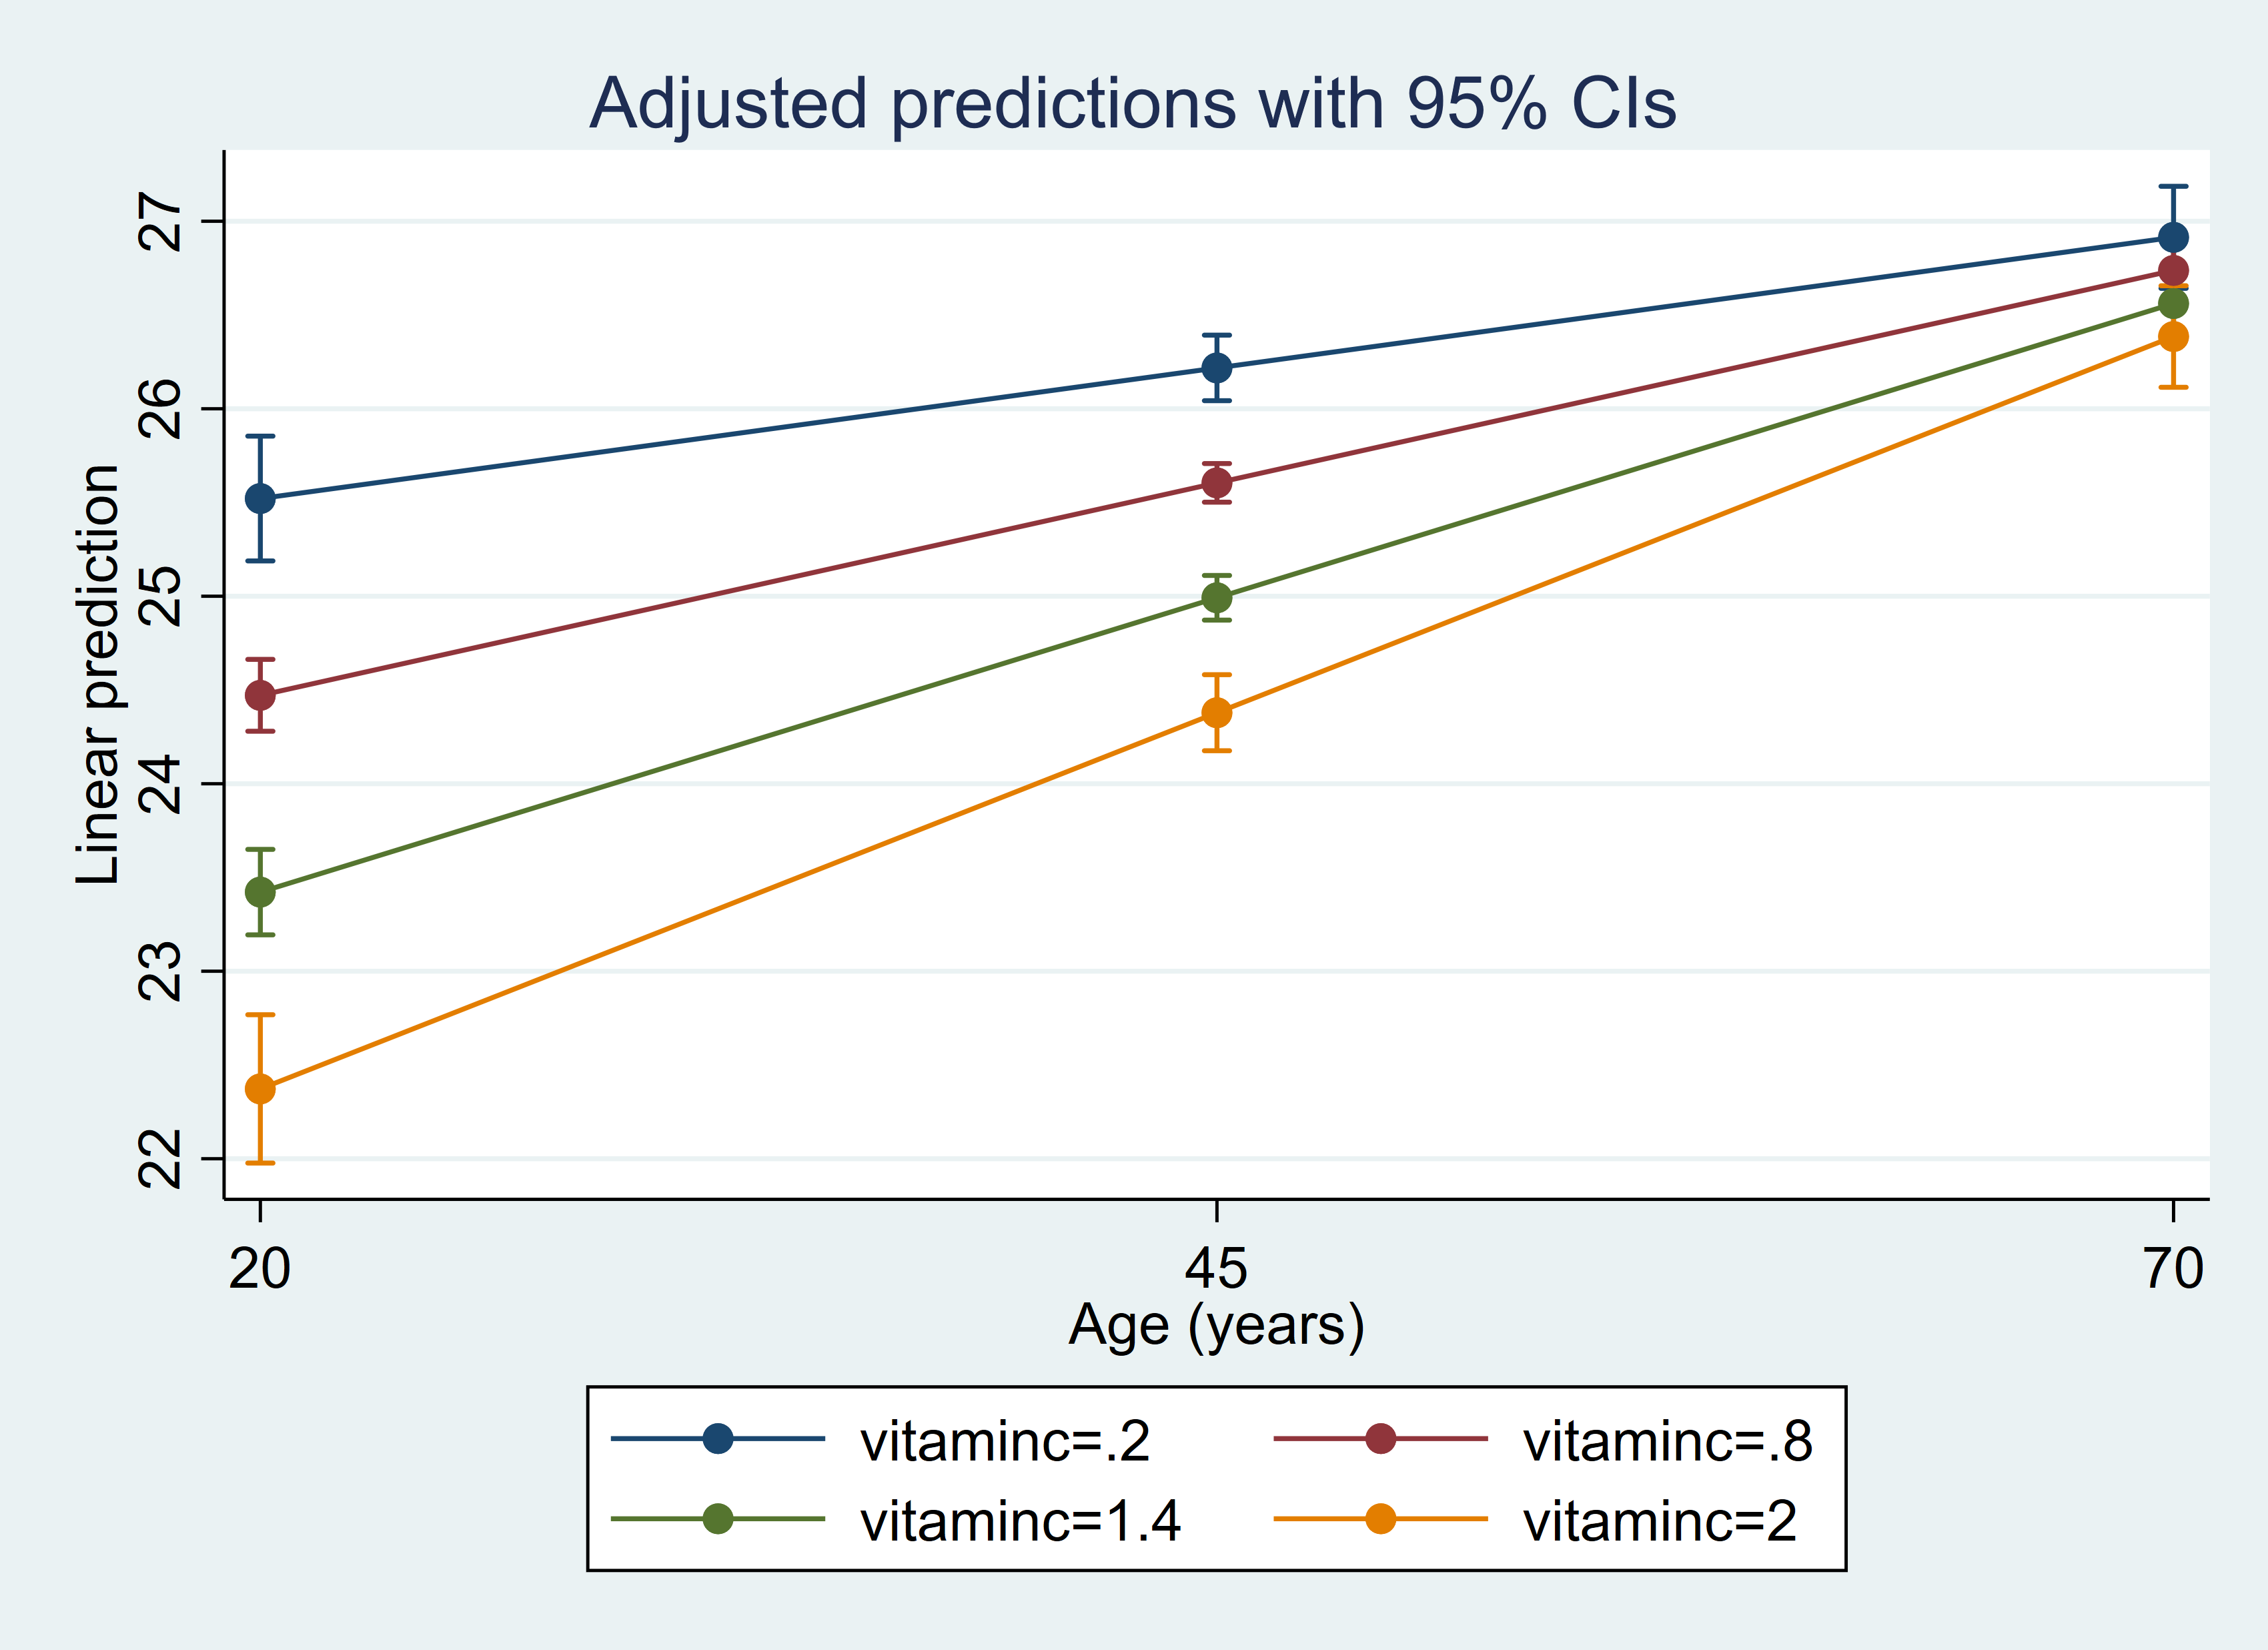

We can see the effect of age on bmi is strongest as vitamin c intake increases. Fro example, we see the slope between age and bmi gets steeper as vitamin c intake increases.

<img src="https://miro.medium.com/max/1864/1*bCCcQhMjHGaI89i-7i3xFw.png">

# Logistic regression
When you have a dependent variable that is categorical, you have to some form of logistic regression. Right now, we will focus on logist (binary dependent variable).

In [66]:
use "http://www.stata-press.com/data/agis6/divorce.dta", clear
list divorce positives




     +--------------------+
     | divorce   positi~s |
     |--------------------|
  1. |       0         10 |
  2. |       0          8 |
  3. |       0          9 |
  4. |       0          7 |
  5. |       0          8 |
     |--------------------|
  6. |       0          5 |
  7. |       0          9 |
  8. |       0          6 |
  9. |       0          8 |
 10. |       0          7 |
     |--------------------|
 11. |       1          1 |
 12. |       1          1 |
 13. |       1          3 |
 14. |       1          1 |
 15. |       1          4 |
     |--------------------|
 16. |       1          5 |
 17. |       1          6 |
 18. |       1          3 |
 19. |       1          2 |
 20. |       1          0 |
     +--------------------+


In [67]:
scatter divorce positives
graph export "div_obs.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph8.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph8.pdf saved as PDF format

(file div_obs.png not found)
file div_obs.png saved as PNG format


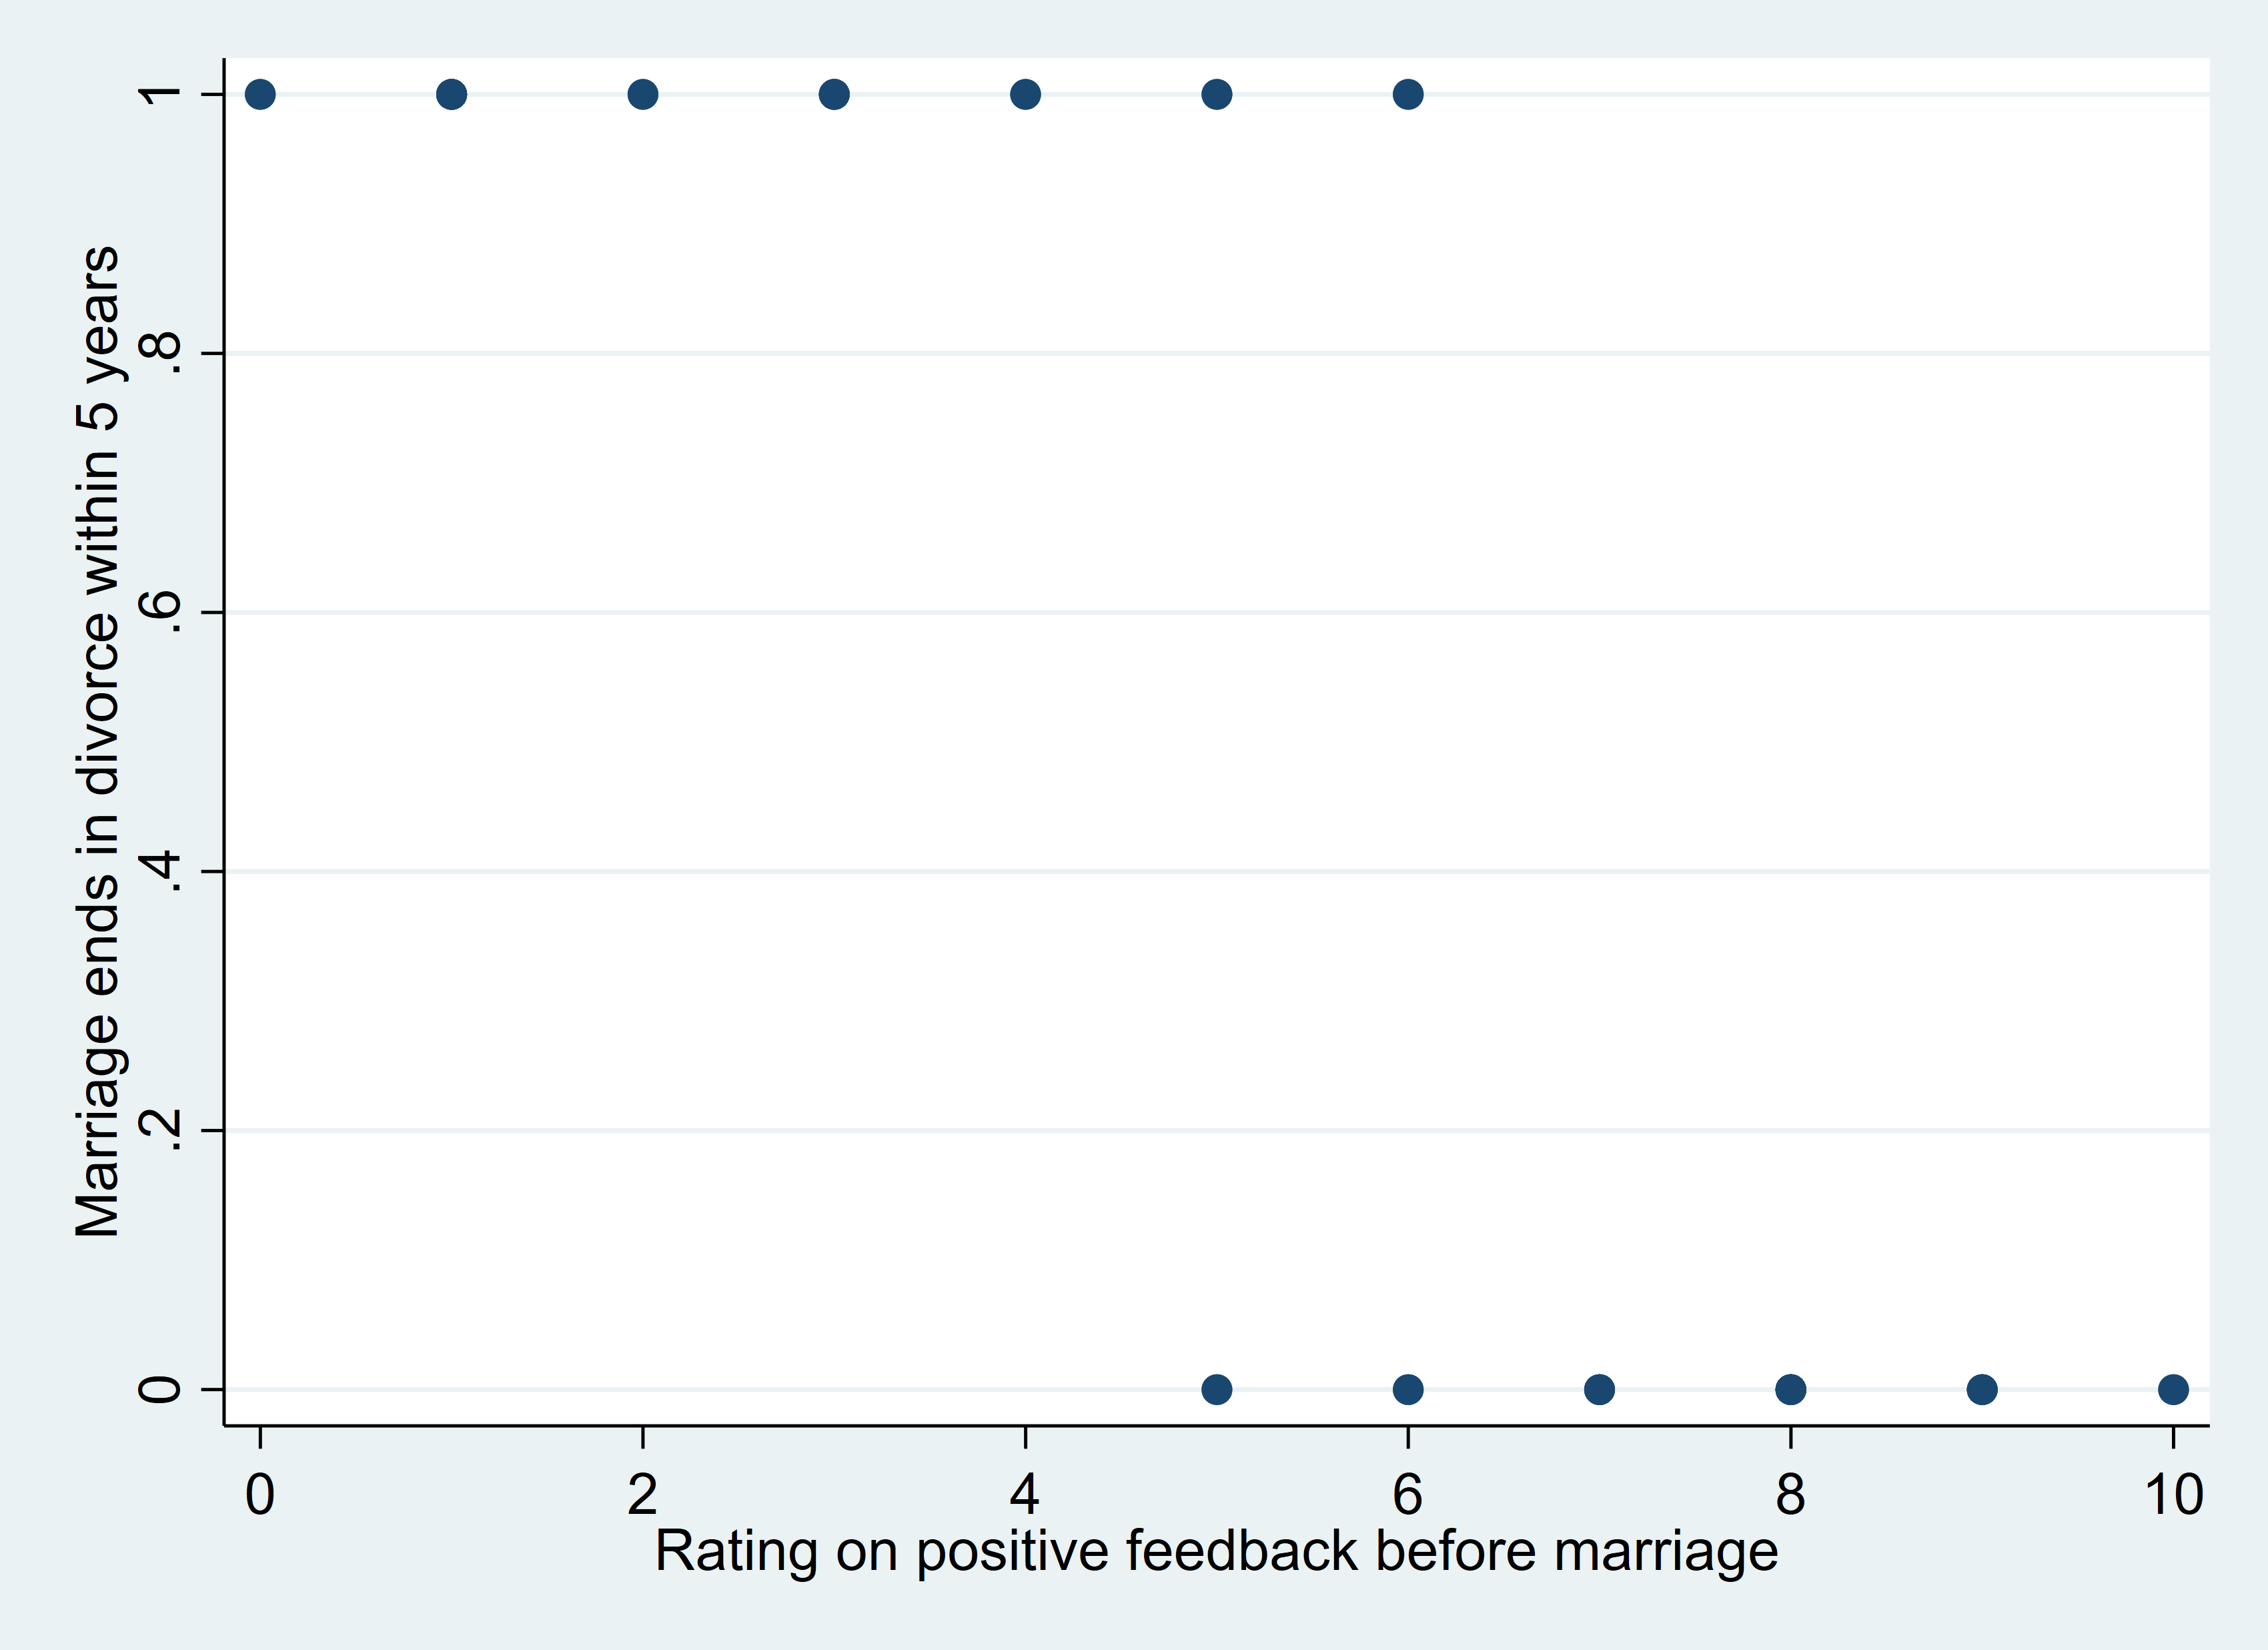

The data is not linear, so we use logit and that transforms the data into linear model.

In [68]:
use "http://www.stata-press.com/data/agis6/environ", clear
tab2 environ libcand, row




-> tabulation of environ by libcand  

+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

Environmen |
       tal |    support liberal
concern: 1 |  candidate: 1 yes, 0
   high, 0 |          no
       low |         0          1 |     Total
-----------+----------------------+----------
         0 |         6          4 |        10 
           |     60.00      40.00 |    100.00 
-----------+----------------------+----------
         1 |         3          7 |        10 
           |     30.00      70.00 |    100.00 
-----------+----------------------+----------
     Total |         9         11 |        20 
           |     45.00      55.00 |    100.00 


<b> Proabilities</b>
* The probability of liberal candidate is 11/20 (.55)
* The probaility of both liberal candidate and having low env concern is 4/10 (.4)
* The probaility of both liberal candidate and having high env concern is 7/10 (.7)

<b> Odd</b>
* The ODDS of liberal candidate is 11/9 (1.22)
* The ODDS of both liberal candidate and having low env concern is 4/6 (.67)
* The ODDS of both liberal candidate and having high env concern is 7/3 (2.33)

<b> Odd ratios</b>
* The ODDS RATIO of liberal candidate of having environmental concern is 3.48 (2.33/.67). The odds of a liberal candidate having high env concern is 3.48 times greater than a liberal candidate having low env concern.
* Odds ratio ranges from 1 to infinity for things more likely to happens and between 0 to 1 for things less likely to happen.
* We can natural log odd ratio to make them normally distributed.

<center>$logit=ln(odds ratio)$

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/logit.png">

In this example, we are interested in predicting one's likelihood of drinking in the last 30 days. This variable is a categorical 0/1 variable. We will be using the following independent variables: age, having peers drinking, having dinners with family, and gender.

<b>Additive model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i)$

In [13]:
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear
codebook drank30 age97 pdrink97 dinner97 male


(National Survey of Youth, 1997, selected variables from first wave)


-------------------------------------------------------------------------------------
drank30                                                                   (unlabeled)
-------------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/8,984
       Unique mv codes: 3                        Missing .*: 5,165/8,984

            Tabulation: Freq.  Value
                        2,094  0
                        1,725  1
                            3  .a
                           15  .b
                        5,147  .d

-------------------------------------------------------------------------------------
age97                                                      age at interview date 1997
--------------------------------------------

In [14]:
summarize drank30 age97 pdrink97 dinner97 male


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     drank30 |      3,819    .4516889    .4977257          0          1
       age97 |      8,984    14.35363    1.488145         12         18
    pdrink97 |      8,799    2.136152    1.246358          1          5
    dinner97 |      5,356     5.07823    2.273635          0          7
        male |      8,984    .5119101     .499886          0          1


In [70]:
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

This reports the odds ratio.

In [71]:
logit drank30 age97 pdrink97 dinner97 male


Iteration 0:   log likelihood = -1100.0502  
Iteration 1:   log likelihood =  -1061.142  
Iteration 2:   log likelihood = -1061.0474  
Iteration 3:   log likelihood = -1061.0474  

Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   .1563548   .0585158     2.67   0.008     .0416659    .2710437
    pdrink97 |   .2846336   .0450001     6.33   0.000     .1964351    .3728321
    dinner97 |  -.0596587    .022151    -2.69   0.007    -.1030739   -.0162434
        male |   -.020721  

This reports the logit. They are transformation of each other. 

<center>$exp_{logit}=(odds ratio)$

In [72]:
logit , coeflegend


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Legend
-------------+----------------------------------------------------------------
       age97 |   .1563548  _b[age97]
    pdrink97 |   .2846336  _b[pdrink97]
    dinner97 |  -.0596587  _b[dinner97]
        male |   -.020721  _b[male]
       _cons |  -2.947557  _b[_cons]
------------------------------------------------------------------------------


In [73]:
di exp(_b[age97])

1.169241


Generally, negative logit indicate below 1 odds ratios and positive indicate greater than 1 odds ratio.

Another thing to note: logistic regression uses maximum likelihood estimation. This is not OLS. This method calculates many iterations of the distributions to figure out its positioning and uses the one with maximum likelihood. 

In [74]:
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

The odd ratios of drinking are multiplied 1.17 for every one year increase to age. For odds ratio that are greater than 1, you can substract the value by one and interpret it as a percent. For example For every one year increase in age, there is a 17% increase in odds of drinking. 

The odd ratios of drinking for men are .97 as compared to women. For odds ratio less than 1, you can substract the value by one and interpret the value as a percent. For example the odds of drinking for men is 2% less as compared to women.

Now, let's say we want to exchange gender for race.

<b>Additive model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(Black_i)$

<b>Interaction model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(Black_i)+\beta_6*(pdrink_iXBlack_i)$

In [15]:
gen black=race97-1
replace black= . if race97>2

label define black 0 "White" 1 "Black"
label define drank30 0 "No" 1 "Yes"
label values drank30 drank30
label values black black


(80 missing values generated)

(1,284 real changes made, 1,284 to missing)






In [16]:
logistic drank30 age97 i.black pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(4)    =  68.99
                                                        Prob > chi2   = 0.0000
Log likelihood = -901.37311                             Pseudo R2     = 0.0369

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.148151    .072974     2.17   0.030     1.013675    1.300468
             |
       black |
      Black  |   .6835464   .0924246    -2.81   0.005     .5244139    .8909673
    pdrink97 |   1.326099   .0639618     5.85   0.000      1.20648    1.457579
    dinner97 |   .9333043   .0229783    -2.80   0.005      .889337    .9794453
       _cons |   .0749969   .0645679    -3.01   0.003     .0138742    .4053945
--------------------

In [80]:
logistic drank30 age97 i.black##c.pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(5)    =  74.90
                                                        Prob > chi2   = 0.0000
Log likelihood = -898.41872                             Pseudo R2     = 0.0400

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.133852   .0723388     1.97   0.049     1.000577    1.284879
             |
       black |
      Black  |   1.204066   .3203253     0.70   0.485     .7148248    2.028154
    pdrink97 |    1.42815   .0822901     6.18   0.000     1.275638    1.598895
             |
       black#|
  c.pdrink97 |
      Black  |    .779586     .07992    -2.43   0.015     .6376792    .9530721
             |
    dinner97 |   .9331713   .0230017   

In [89]:
margins black, at(pdrink=(1 2 3 4 5)) atmeans


Adjusted predictions                                     Number of obs = 1,413
Model VCE: OIM

Expression: Pr(drank30), predict()
1._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        1
       dinner97 = 4.760793 (mean)
2._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        2
       dinner97 = 4.760793 (mean)
3._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        3
       dinner97 = 4.760793 (mean)
4._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        4
       dinner97 = 4.760793 (mean)
5._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        5
       dinner97 = 4.760793 (mean)

-----------------------------------------------------

In [90]:
marginsplot
graph export "race_drink.png", replace width(3400)



Variables that uniquely identify margins: pdrink97 black

file C:/Users/acade/.stata_kernel_cache/graph11.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph11.pdf saved as PDF format

file race_drink.png saved as PNG format


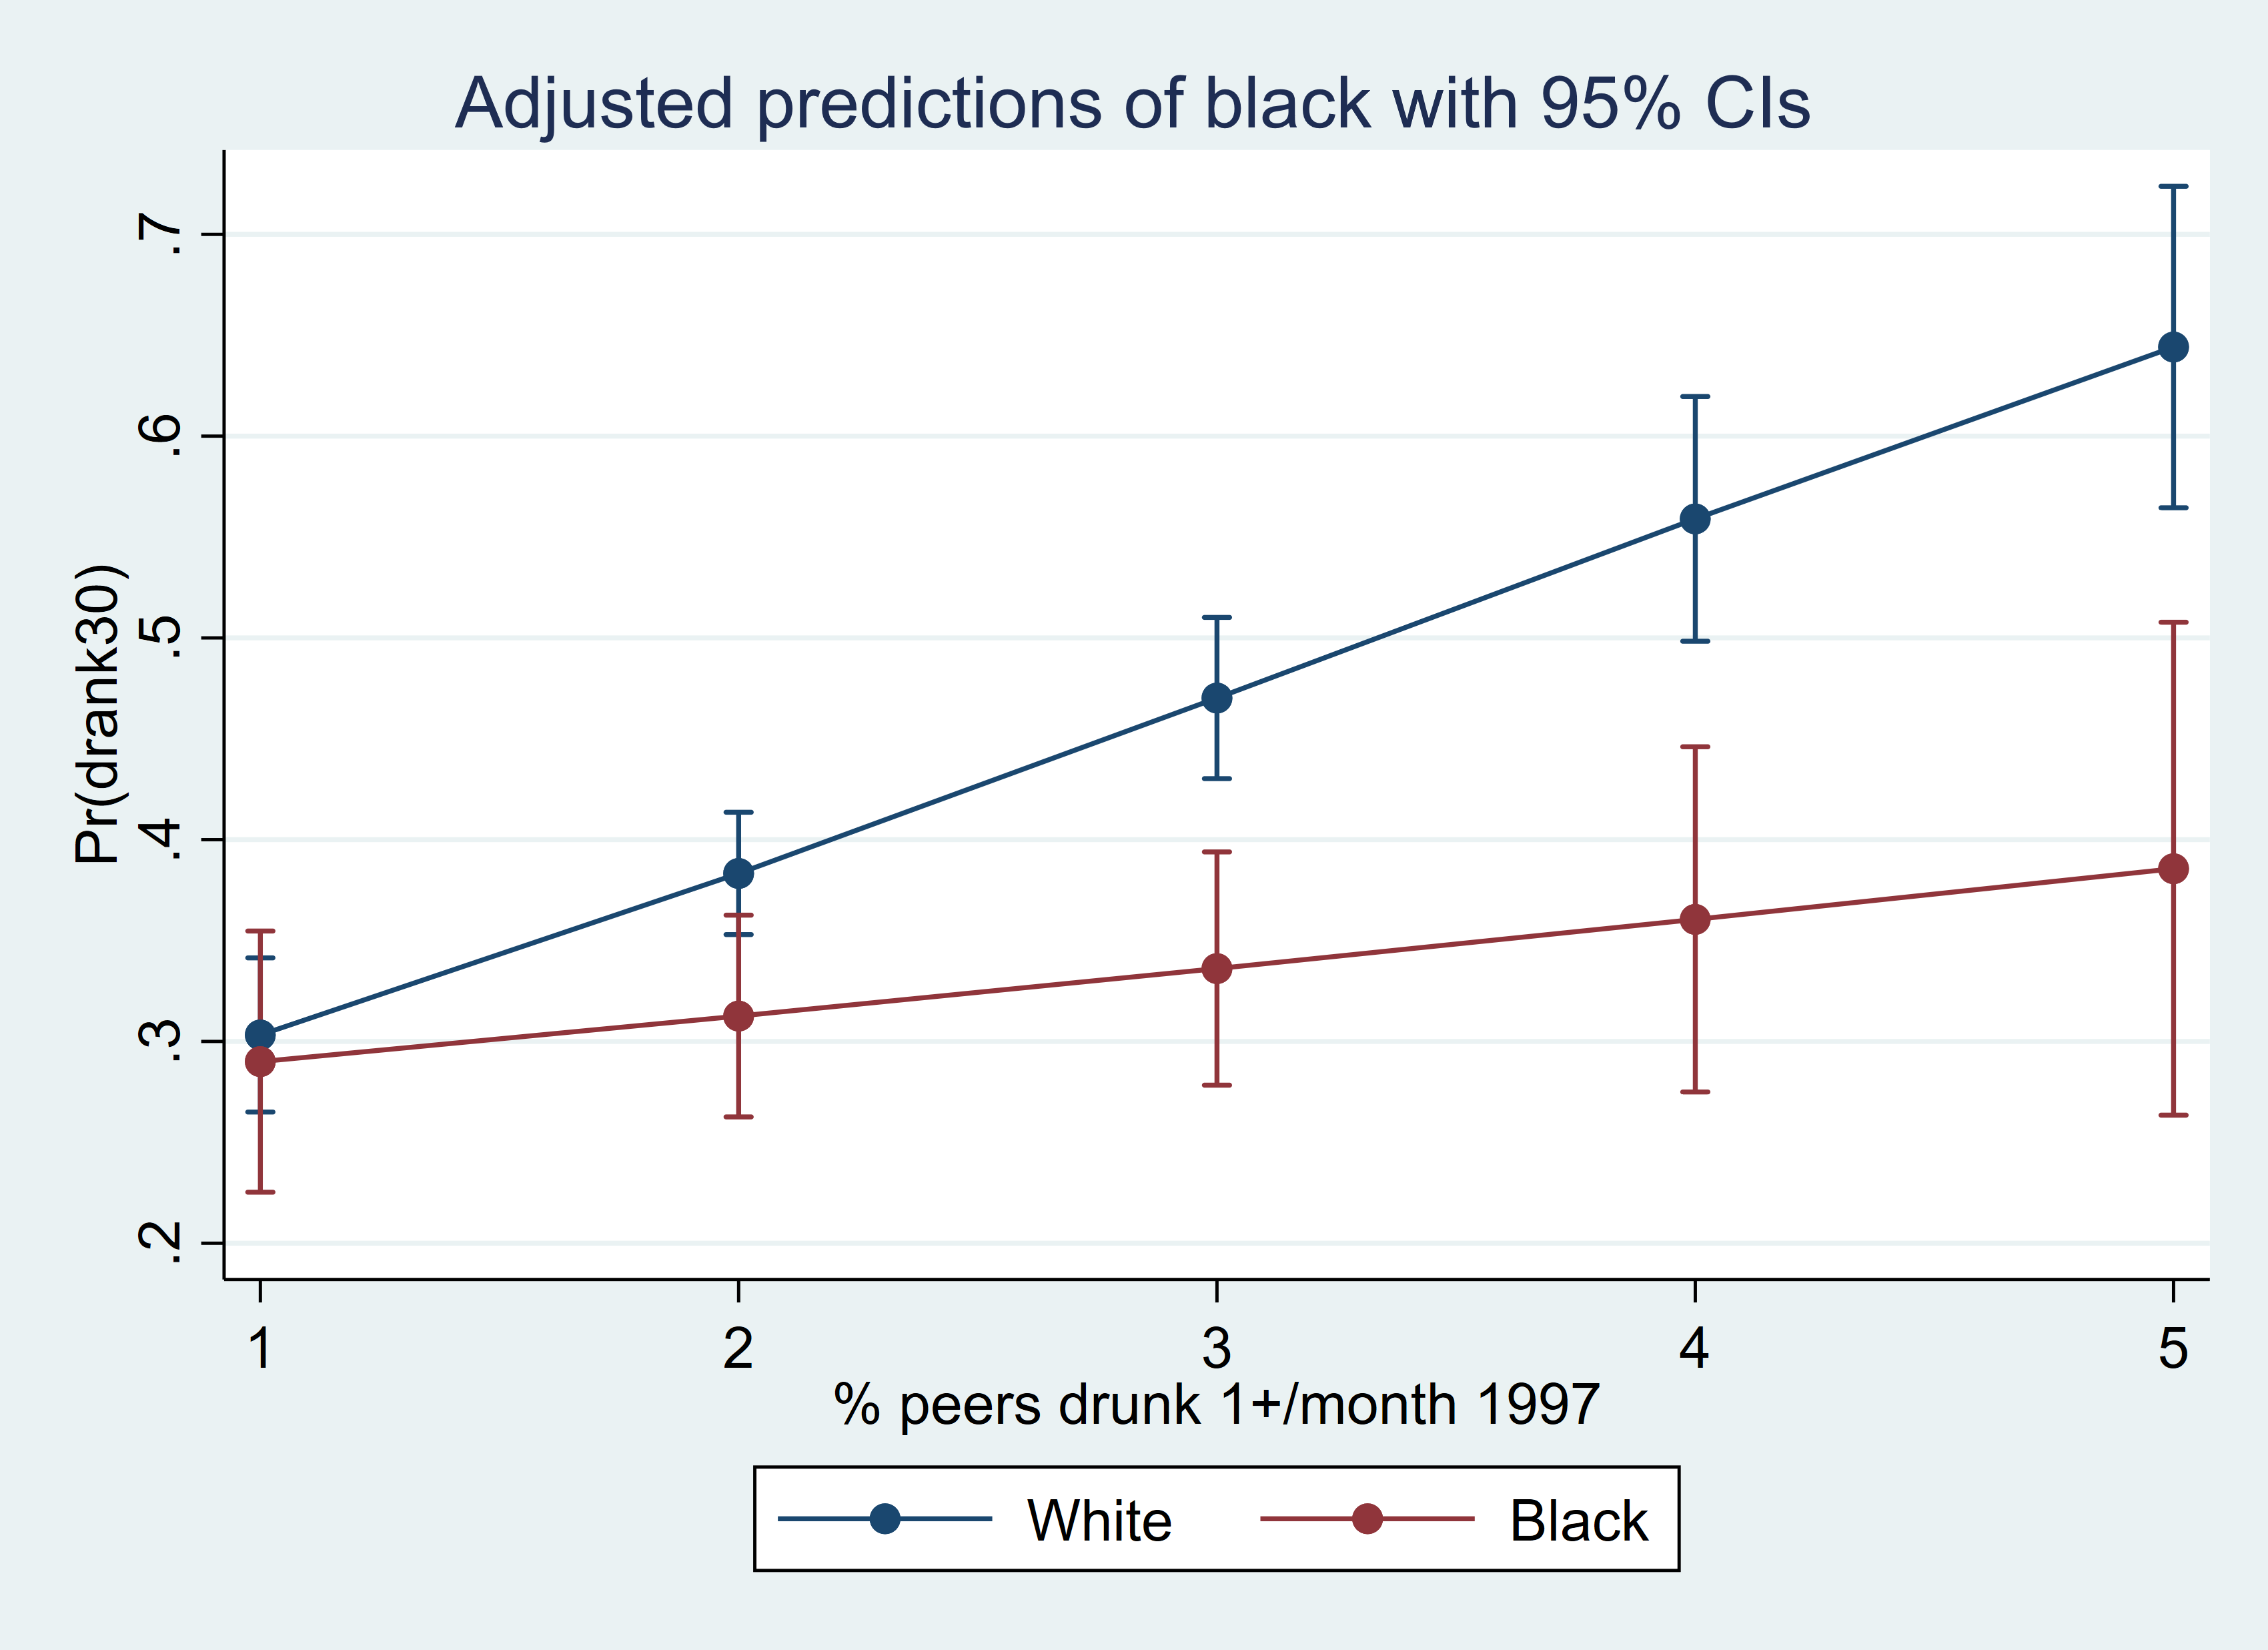

We see the odds for drinking in the last 30 days increases a greater rate for white people as number of peers who drink increases. The interaction term is also statistically significant.